# Exploratory Data Analysis of the Indian StartUp Funding Ecosystem 

### Business Understanding

**Project Description:**

Explore the Indian startup funding ecosystem through an in-depth analysis of funding data from 2019 to 2021. Gain insights into key trends, funding patterns, and factors driving startup success. Investigate the relationship between funding and startup growth, with a focus on temporal patterns and city-level dynamics. Identify preferred sectors for investment and uncover industry-specific funding trends. This exploratory data analysis provides a comprehensive overview of the Indian startup ecosystem, offering valuable insights for entrepreneurs, investors, and policymakers.

## Data Understanding

This project aims to explore and gain a deeper understanding of the Indian startup funding ecosystem. The dataset used for analysis contains information about startup funding from 2019 to 2021. The dataset includes various attributes such as the company's name, sector, funding amount, funding round, investor details, and location.

To conduct a comprehensive analysis, we will examine the dataset to understand its structure, contents, and any potential data quality issues. By understanding the data, we can ensure the accuracy and reliability of our analysis.

The key attributes in the dataset include:

- **Company**: The name of the startup receiving funding.
- **Sector**: The industry or sector to which the startup belongs.
- **Amount**: The amount of funding received by the startup.
- **Stage**: The round of funding (e.g., seed, series A, series B).
- **Location**: The city or region where the startup is based.
- **About**: What the company does.
- **Funding Year**:When the company was funded

By examining these attributes, we can uncover insights about the funding landscape, identify trends in funding amounts and rounds, explore the preferred sectors for investment, and analyze the role of cities in the startup ecosystem.

Throughout the analysis, we will use visualizations and statistical techniques to present the findings effectively. By understanding the data and its characteristics, we can proceed with confidence in our analysis, derive meaningful insights, and make informed decisions based on the findings.

# First Dataset

#### Install pyodbc and python-dotenv

In [1]:
'''%pip install pyodbc  
%pip install python-dotenv

# other modules that are necessary
%pip install pandas
%pip install seaborn
%pip3 install matplotlib
%pip install numpy
%pip install scipy '''

'%pip install pyodbc  \n%pip install python-dotenv\n\n# other modules that are necessary\n%pip install pandas\n%pip install seaborn\n%pip3 install matplotlib\n%pip install numpy\n%pip install scipy '

### Import all the necessary packages

In [2]:
# Importing the Modules needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
color = sns.color_palette()
import matplotlib.colors as mcolors

import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

import re 

from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
import scipy.stats
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kruskal, mannwhitneyu


In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [5]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 
# Loads 2020 & 2021 datasets respectively
query1 = "SELECT * FROM dbo.LP1_startup_funding2020"
query2 = "SELECT * FROM dbo.LP1_startup_funding2021"
df3 = pd.read_sql(query1, connection)
df4 = pd.read_sql(query2, connection)

# Second Dataset

In [6]:
df = pd.read_csv('startup_funding2018.csv') # read the data_2018 and convert it to pandas data frame 

# Third Dataset

In [7]:
df2 = pd.read_csv('startup_funding2019.csv') # read the data_2019 and convert it to pandas data frame

### Hypothesis:

#### NULL Hypothesis (HO) :

#### **The sector of a company does not have an impact on the amount of funding it receives.**


#### ALTERNATE Hypothesis (HA):

#### **The sector of a company does have an impact on the amount of funding it receives.**




##  Research / Analysis Questions:

1. What is the distribution of funding amounts made each year?

2. What is the range of funds generally received by startups in India (Max, min, avg,count of funding etc)? 

3. Which cities have the highest number of startups?

4. What are the top industries that received the highest funding amounts?

5. Which industries are favored by investors based on the number of funding rounds? 

6. How many startups were funded each year?

7. What are the temporal patterns of funding amounts for startups over the years?

8. Are there any correlations between the funding amount and the company's sector or location? 

9. What are the different types of funding received by startups?

10. What is the percentage distribution of startups based on their location?

11. How has the number of startups funded each year changed over time?

## Data Preparation

Before diving into the analysis, we will preprocess and clean the data to ensure its quality and suitability for analysis. This may involve handling missing values, correcting data types, and addressing any inconsistencies or outliers that could affect the accuracy of our results.

Once the data is prepared, we will be ready to perform an in-depth exploratory analysis of the Indian startup funding ecosystem. The analysis will involve answering specific research questions, identifying patterns and trends, and generating meaningful visualizations to present the findings.

Through this process of data understanding and preparation, we will set a solid foundation for conducting a robust and insightful analysis of the Indian startup funding data.

**The data for each year is sourced from separate two csv files and two from a remote server. They will be merged later to one dataset**

# Load & Clean Datasets

#### 2018 Data

In [8]:
df.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [9]:
df.shape # displaying the shape of the data as in column and row wise

(526, 6)

In [10]:
df.columns # here we want to look at the columns in data set

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [11]:
df.info()  # Getting information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [12]:
df.describe(include='object').T  # here Generating descriptive statistics of the DataFrame

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


now we have some description about the data set, we can now move on with data cleaning
 
MISSING VALUES 

In [13]:
df.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

#### Handling Duplicated Data

In [14]:
# below we are checking duplicates values withinn the columns 

columns_to_check = ['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location', 'About Company']

for column in columns_to_check:
    has_duplicates = df[column].duplicated().any()
    print(f'{column}: {has_duplicates}')

Company Name: True
Industry: True
Round/Series: True
Amount: True
Location: True
About Company: True


In [15]:
df.drop_duplicates(subset=['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location', 'About Company'], inplace=True)

Standardizing Data Formats

now let's see how we can standardize tha data set to make sure we have the same format of data points 

first let's check for dash symbols within the columns using a simple python function 

In [16]:
# below we are checking for '-' symbols within the columns

columns_to_check = ['Amount', 'Company Name', 'Location', 'About Company', 'Industry', 'Round/Series']

for column in columns_to_check:
    has_dash_symbols = df[column].str.contains('—').any()
    print(f"{column}: {has_dash_symbols}")

Amount: True
Company Name: False
Location: False
About Company: False
Industry: True
Round/Series: False


## Amount Column

now let's handle the dash symbols in **the Amount column**, clean and format the amount the column correctly & Convert Currency to USD

In [17]:
df['Amount'].head() # first let's look at the Amount the column

0         250000
1    ₹40,000,000
2    ₹65,000,000
3        2000000
4              —
Name: Amount, dtype: object

## Assumptions Made for Amount Column
- Amounts without currency symbols in the 2018 dataset are in USD.
- The average Indian Rupee (INR) to US Dollar (USD) rate for the relevant year will be used for currency conversions.
- Use exchange rate from https://www.exchangerates.org.uk/INR-USD-spot-exchange-rates-history-2018.html, use the average exchange rate of 0.0146

In [18]:
# Set the desired exchange rate
exchange_rate = 0.0146

# Cleaning the Amounts column
df['Amount'] = df['Amount'].apply(str)
df['Amount'].replace([',', '—', '$'], ['', 0, ''], inplace=True, regex=True)

# Extract the Indian currency amount
df['Indiancurr'] = df['Amount'].str.rsplit('₹', n=2).str[1]
df['Indiancurr'] = df['Indiancurr'].apply(float).fillna(0)

# Convert Indian currency to USD using the specified exchange rate
df['UsCurr'] = df['Indiancurr'] * exchange_rate

# Replace 0 values with NaN
df['UsCurr'] = df['UsCurr'].replace(0, np.nan)

# Fill NaN values in 'UsCurr' with original 'Amount' values
df['UsCurr'] = df['UsCurr'].fillna(df['Amount'])

# Remove '$' symbol from 'UsCurr' column
df['UsCurr'] = df['UsCurr'].replace("$", "", regex=True)

# Update 'Amount' column with converted USD values
df['Amount'] = df['UsCurr'].apply(lambda x: float(str(x).replace("$","")))

# Replace 0 values with NaN in 'Amount' column
df['Amount'] = df['Amount'].replace(0, np.nan)

# Format the 'Amount' column
format_amount = lambda amount: "{:,.2f}".format(amount)
df['Amount'] = df['Amount'].map(format_amount)

In [19]:
df['Amount'] = df['Amount'].str.replace(',', '').astype(float) # since the Amount column is holding and amount, we have to comvert it to float
type(df['Amount'][0])

numpy.float64

In [20]:
df.drop(columns=['Indiancurr','UsCurr'], inplace=True) # dropping some colunmns we need no more 

In [21]:
df['Amount'].head()

0     250000.0
1     584000.0
2     949000.0
3    2000000.0
4          NaN
Name: Amount, dtype: float64

#### Handling Categorical Data
NOW LET'S 

handle the categorical data in the 'Industry', 'Round/Series', and 'Location' columns

Analyzing unique values
Start by examining the unique values in each column to identify any inconsistencies or variations we do this 
Using the unique() function to get the unique values in each column.

### Location Column

#### The Location column contains combined information (e.g., city, state, country)

In [22]:
df['Location'].unique() # checking each unique values 

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [23]:
# The 'Location' column is in the format, 'City, Region, Country',
# Only 'City' aspect is needed for this analysis
# Take all character until we reach the first comma sign

df['Location'] = df['Location'].apply(str)
df['Location'] = df['Location'].str.split(',').str[0]
df['Location'] = df['Location'].replace("'","",regex=True)

In [24]:
# From observation, some city names that refer to the same place are appearing different.
# The incorrect names need to be rectified for correct analysis, eg A city with more than one name.
df["Location"] = df["Location"].replace (['Bangalore','Bangalore City'], 'Bengaluru')
df.loc[~df['Location'].str.contains('New Delhi', na=False), 'Location'] = df['Location'].str.replace('Delhi', 'New Delhi')
df['Location'] = df['Location'].replace (['Gurgaon'], 'Gurugram')

In [25]:
df['Location'].unique() # checking the unique values once more

array(['Bengaluru', 'Mumbai', 'Gurugram', 'Noida', 'Hyderabad', 'Kalkaji',
       'New Delhi', 'India', 'Hubli', 'Chennai', 'Mohali', 'Kolkata',
       'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana',
       'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum',
       'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur', 'Trivandrum',
       'Ernakulam', 'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore',
       'Ghaziabad', 'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal',
       'Coimbatore', 'Worli', 'Alleppey', 'Chandigarh', 'Guindy',
       'Lucknow'], dtype=object)

In [26]:
df['Location'].isnull().sum() # checking for null values in the loaction column

0

### Industry Column

In [27]:
# let's check all the unique values in the industry column
df['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [28]:
df['Industry'].value_counts() # counting all the unique values in the Industry column 

Industry
—                                                                                 30
Financial Services                                                                15
Education                                                                          8
Information Technology                                                             7
Finance, Financial Services                                                        5
                                                                                  ..
Business Intelligence, Customer Service, Market Research, SaaS                     1
Digital Media, Internet, Media and Entertainment, Online Portals, Social Media     1
Consumer Lending, Financial Services, Lending, Personal Finance                    1
Education, Information Technology, Internet, Mobile, Software                      1
Biotechnology, Health Care, Pharmaceutical                                         1
Name: count, Length: 405, dtype: int64

In [29]:
df[df['Industry']=='—']

,Company Name,Industry,Round/Series,Amount,Location,About Company
58,MissMalini Entertainment,—,Seed,1518400.0,Mumbai,MissMalini Entertainment is a multi-platform n...
105,Jagaran Microfin,—,Debt Financing,8030000.0,Kolkata,Jagaran Microfin is a Microfinance institution...
121,FLEECA,—,Seed,NaN,Jaipur,FLEECA is a Tyre Care Provider company.
146,WheelsEMI,—,Series B,14000000.0,Pune,"WheelsEMI is the brand name of NBFC, WheelsEMI..."
153,Fric Bergen,—,Venture - Series Unknown,NaN,Alwar,Fric Bergen is a leader in the specialty food ...
174,Deftouch,—,Seed,NaN,Bengaluru,Deftouch is a mobile game development company ...
181,Corefactors,—,Seed,NaN,Bengaluru,"Corefactors is a leading campaign management, ..."
210,Cell Propulsion,—,Seed,102200.0,Bengaluru,Cell Propulsion is an electric mobility startu...
230,Flathalt,—,Angel,50000.0,Gurugram,FInd your Customized Home here.
235,dishq,—,Seed,400000.0,Bengaluru,dishq leverages food science and machine learn...


In [30]:
# renaming some of the Company names to their official names
company_mapping = {
    'dishq': 'DISH',
    'HousingMan.com': 'HousingMan',
    'ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED': 'ENLYFT DIGITAL SOLUTIONS',
    'Toffee': 'Toffee Pvt Ltd',
    'Avenues Payments India Pvt. Ltd.': 'Avenues Payments',
    'Planet11 eCommerce Solutions India (Avenue11)': 'Planet11',
}
# Replace the dash symbol with the corresponding values using map function
df['Company Name'].replace(company_mapping, inplace=True)

In [31]:
df.loc[df['Company Name'] == 'MissMalini Entertainment', 'Industry'] = 'Media'
df.loc[df['Company Name'] == 'Jagaran Microfin', 'Industry'] = 'Financial Services'
df.loc[df['Company Name'] == 'FLEECA', 'Industry'] = 'Automotive'
df.loc[df['Company Name'] == 'WheelsEMI', 'Industry'] = 'Financial Services'
df.loc[df['Company Name'] == 'Fric Bergen', 'Industry'] = 'Food'
df.loc[df['Company Name'] == 'Deftouch', 'Industry'] = 'Gaming'
df.loc[df['Company Name'] == 'Corefactors', 'Industry'] = 'Technology'
df.loc[df['Company Name'] == 'Cell Propulsion', 'Industry'] = 'Automotive'
df.loc[df['Company Name'] == 'Flathalt', 'Industry'] = 'Real Estate'
df.loc[df['Company Name'] == 'DISH', 'Industry'] = 'Food'
df.loc[df['Company Name'] == 'Trell', 'Industry'] = 'Travel'
df.loc[df['Company Name'] == 'HousingMan', 'Industry'] = 'Real Estate'
df.loc[df['Company Name'] == 'Steradian Semiconductors', 'Industry'] = 'Technology'
df.loc[df['Company Name'] == 'SaffronStays', 'Industry'] = 'Travel'
df.loc[df['Company Name'] == 'Inner Being Wellness', 'Industry'] = 'Beauty'
df.loc[df['Company Name'] == 'MySEODoc', 'Industry'] = 'Marketing'
df.loc[df['Company Name'] == 'ENLYFT DIGITAL SOLUTIONS', 'Industry'] = 'Marketing'
df.loc[df['Company Name'] == 'Scale Labs', 'Industry'] = 'Ecommerce'
df.loc[df['Company Name'] == 'Roadcast', 'Industry'] = 'Logistics'
df.loc[df['Company Name'] == 'Toffee Pvt Ltd', 'Industry'] = 'Insurance'
df.loc[df['Company Name'] == 'ORO Wealth', 'Industry'] = 'Financial Services'
df.loc[df['Company Name'] == 'Finwego', 'Industry'] = 'Financial Services'
df.loc[df['Company Name'] == 'Cred', 'Industry'] = 'Fintech'
df.loc[df['Company Name'] == 'Origo', 'Industry'] = 'Agriculture'
df.loc[df['Company Name'] == 'Sequretek', 'Industry'] = 'Cyber Security'
df.loc[df['Company Name'] == 'Avenues Payments', 'Industry'] = 'Financial Services'
df.loc[df['Company Name'] == 'Planet11', 'Industry'] = 'E-commerce'
df.loc[df['Company Name'] == 'Iba Halal Care', 'Industry'] = 'Beauty'
df.loc[df['Company Name'] == 'Togedr', 'Industry'] = 'Travel'
df.loc[df['Company Name'] == 'Scholify', 'Industry'] = 'Edutech'

In [32]:
df[df['Industry']=='—']

,Company Name,Industry,Round/Series,Amount,Location,About Company


In [33]:
# keeping only the first unique vlaues in the Industry column
df['Industry'] = df['Industry'].str.split(',').str[0]
#converting the industry names in the column to title case
df['Industry'] = df['Industry'].str.title()

In [34]:
# remove the leading or trailing spaces from the industry names in the 'Industry' column
df['Industry'] = df['Industry'].str.strip()

In [35]:
df['Industry'].isnull().sum() # confirming the null values in the industry column 

0

### Round/Series Column

In [36]:
df['Round/Series'].unique() # getting the unique values 

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [37]:
# below we are replacing some unique values such as undisclosed with nan and remove some inconsistency from the data

df['Round/Series']=df['Round/Series'].replace('Undisclosed',np.nan)
df['Round/Series']=df['Round/Series'].replace('Venture - Series Unknown',np.nan)
df['Round/Series'] = df['Round/Series'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 'nan')
df['Round/Series'] = df['Round/Series'].replace('nan', np.nan)

In [38]:
df['Round/Series'].unique() # getting the unique values 

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', nan, 'Grant', 'Debt Financing', 'Post-IPO Debt',
       'Series H', 'Series C', 'Series E', 'Corporate Round', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

BELOW WE ARE CHECKING FOR NULL VALUES IN THE ROUND/SERIES COLUMN 

In [39]:
df['Round/Series'].isnull().sum() # checking for null values

40

In [40]:
len(df['Round/Series'])

525

DEALING WITH THE NULL VALUES IN THE ROUND/SERIES 

In [41]:
most_frequent_stage = df['Round/Series'].mode()[0]
df['Round/Series'].fillna(most_frequent_stage, inplace=True)

NOW LET'S CONFRIM THE MISSING VALUES IN THE ROUND/SERIES AGAIN 

In [42]:
# confirming the null values in the Round/Series column again 
df['Round/Series'].isnull().sum()

0

In [43]:
df['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Grant', 'Debt Financing', 'Post-IPO Debt',
       'Series H', 'Series C', 'Series E', 'Corporate Round', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

NOW LET'S DO FINAL CLEANING TO BE SURE # 2018 DATA SETS 
WE WILL START BY CHECKING FOR NULL VALUES 

In [44]:
# here we want to check for null values in the entire data set
df.isnull().sum()


Company Name       0
Industry           0
Round/Series       0
Amount           148
Location           0
About Company      0
dtype: int64

NOW LET'S DEAL WITH THE AMOUNT COLUMN


In [45]:
# first let's check for the percentage of missing values in the Amount column
Amount_missing = df['Amount'].isna().sum()
Amount_total = df['Amount'].count()
percent_Amount_missing = (Amount_missing / Amount_total) * 100
percent_Amount_missing

39.257294429708224

TO TAKE OF THE NULL OR MISSING VALUES. WE WILL FIRST NEED TO UNDERSTAND THE PATTERN OF THE MISSING DATA 


first let's identify if there is any relationship between the missing values and the diffferent sectors 
this insight into the missing value will guide us on how to properly impute for the missing values 

We will start by creating a contingency table to show the distribution of missing values across the different
Sectors 

NOTE: this table and test is to help us prove or reject a hypothesis, by conducting a chi-square test 
Using the chi2_contingency function from the scipy.stats module to perform the chi-square test, this function calculates the chi-square statistic, p-value, degrees of freedom, and expected frequencies

but we will only look at the p-value with a specific chosen significant value 

Finally, we will interprete the result of the p-value, if the p-value is below a chosen significance level (e.g., 0.05), we can reject the null hypothesis and conclude that there is a significant association between the missing values in the "Amount" column and the "Sector" column.

BELOW IS THE HYPOTHESIS AND THE ALTERNATIVE HYPOTHESIS

Null hypothesis (H0): There is no association between the missing values in the "Amount" column and the "Sector" column.

Alternative hypothesis (H1): There is a significant association between the missing values in the "Amount" column and the "Sector" column


Creating a contingency table:

 we will use the pd.crosstab() function to create a contingency table that will shows the distribution of missing values across the different sectors. This table will help us visualize the association between the two variables.

In [46]:
# creating the contingency table

conting_table = pd.crosstab(df['Industry'], df['Amount'].isnull())
conting_table

Amount,False,True
Industry,,
3D Printing,0,1
Accounting,2,1
Advertising,2,2
Aerospace,1,1
Agriculture,4,5
...,...,...
Travel,4,2
Veterinary,1,0
Wealth Management,1,0


 now let's Perform the chi-square test: 

 Using the chi2_contingency() function from the scipy.stats module we will perform the chi-square test. This function calculates the chi-square statistic, p-value, degrees of freedom, and expected frequencies.

In [47]:
# below we are performing the chi-square test
chi2, p_value, _,_ = chi2_contingency(conting_table)
p_value

0.2887474177533935

Interpreting the results:

Checking the p-value obtained from the chi-square test.

If the p-value is below our chosen significance level (in this case 0.05), we can reject the null hypothesis and conclude that there is a significant association between the missing values in the "Amount" column and the "Sector" column. If the p-value is above the significance level, we fail to reject the null hypothesis.

In [48]:
# we are interpretting the chi-sqaure test 
significance_level = 0.05

if p_value < significance_level:
    print("There is a significant association between the missing values in the 'Amount' column and the 'Sector' column.")
else:
    print("There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.")


There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.


From the above output we can drop this approach to fill in the missing values 

THE NEXT APPROACH IS TO USE THE: 


Missing Data Patterns: 

We will analyze the patterns of missing values in the 'Amount' column and other relevant columns, in our case the 'Amount', 'Sector', 'Stage', 'Location' If the missing values are missing completely at random (MCAR) or missing at random (MAR), it may indicate that imputation methods like median imputation could be suitable.


BELOW WE WILL USE HEAT MAP AND CORRELATION PLOT TO TRY AND DETERMINE SOME PATTERNS 

1. MISSING DATA HEAT MAP

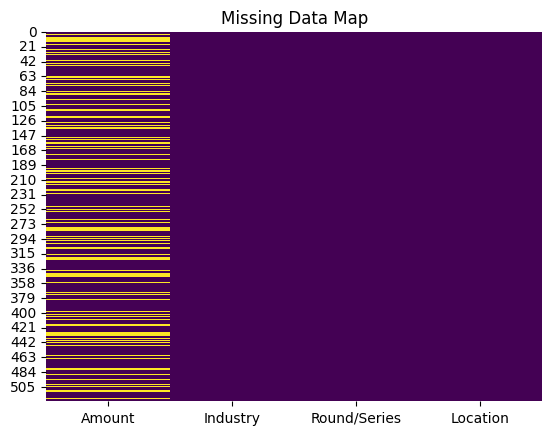

In [49]:
# creating a subset of the relevant columns
rele_col = ['Amount', 'Industry', 'Round/Series', 'Location']

# creating a dataframe with missing value indicator 
missing_indicator_df = df[rele_col].isnull()

# below we are creating a missing data heat map
sns.heatmap(missing_indicator_df, cmap='viridis', cbar=False)
plt.title('Missing Data Map')
plt.show()

The information from the above supports the assumption that the missing values in the 'Amount' column are missing completely at random (MCAR) or missing at random (MAR). This means that the missingness is unrelated to the 'Sector', 'Location', or 'Stage' variables.

Based on this pattern of missingness, median imputation could be a reasonable option to impute the missing values in the 'Amount' column.

NOW LET'S IMPUTE THE MISSING VALUES USING THE MEDIAN IMPUTATION 

In [50]:
# we are creating the median of the not missing values 
median_non_null_Amount = df['Amount'].dropna()

median_Amount = median_non_null_Amount.median() 

# below we are filling in the missing values with the median 
df['Amount'].fillna(median_Amount, inplace=True)

NOW LET'S CONFRIM THE AMOUNT FOR MISSING VALUES AGAIN 

In [51]:
df['Amount'].isnull().sum() # checking for null values 

0

### Clean Categorical Data 

In [52]:
# Clean Company Name column
df['Company Name'] = df['Company Name'].str.strip()  # Remove leading and trailing spaces
df['Company Name'] = df['Company Name'].str.title()  # Standardize capitalization

# Clean About Company column
df['About Company'] = df['About Company'].str.strip()  # Remove leading and trailing spaces

# Function to handle special characters or encoding issues
def clean_text(text):
    # Remove special characters using regex
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return cleaned_text

# Apply the clean_text function to the About Company column
df['About Company'] = df['About Company'].apply(clean_text)

In [53]:
df.columns # looking at the columns in the data set to comfirm 

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [54]:
df.insert(6,"Funding Year", 2018) # inserting a new column 'startup_funding 2018' to keep track of this data set

In [55]:
# below are renaming the columns to ensure consistency when combinning the four data sets 

df.rename(columns = {'Company Name':'Company',
                        'Industry':'Sector',
                        'Amount':'Amount',
                        'About Company':'About',
                        'Round/Series' : 'Stage'},
             inplace = True)

In [56]:
df.isnull().sum() # checking to confirm if any of the column is still have nan

Company         0
Sector          0
Stage           0
Amount          0
Location        0
About           0
Funding Year    0
dtype: int64

In [57]:
df.to_csv('df_2018.csv', index=False) # here we are saveing the clean data and naming it df18.csv

## 2019 Data

In [58]:
df2.head() # first let's look at the head of the data set 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [59]:
df2.shape # now let's look at the shape of the data to get some idea about the columns and rows 

(89, 9)

In [60]:
df2.columns # now let's look at the columns in the 2019 data sets 

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [61]:
df2.info() # Getting inforamation about the data2 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [62]:
df2.describe(include='object').T # getting General descriptive statistics of the data2 dataFrame

,count,unique,top,freq
Company/Brand,89,87,Kratikal,2
HeadQuarter,70,17,Bangalore,21
Sector,84,52,Edtech,7
What it does,89,88,Online meat shop,2
Founders,86,85,"Vivek Gupta, Abhay Hanjura",2
Investor,89,86,Undisclosed,3
Amount($),89,50,Undisclosed,12
Stage,43,15,Series A,10


#### Handling Duplicated Data

In [63]:
# below we are checking for duplicated values within the columns 

columns_to_check2 = ['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does', 'Founders', 'Investor', 'Amount($)', 'Stage',]

for column2 in columns_to_check2:
    has_duplicates2 = df2[column2].duplicated().any()
    print(f'{column2}: {has_duplicates2}')

Company/Brand: True
Founded: True
HeadQuarter: True
Sector: True
What it does: True
Founders: True
Investor: True
Amount($): True
Stage: True


In [64]:
# below we are dropping all the duplicated rows within the colums

df2.drop_duplicates(subset=['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does', 'Founders', 'Investor', 'Amount($)', 'Stage',], inplace=True)

now we have some description about the data set, we can now move on with data cleaning
 
MISSING VALUES 

In [65]:
missing_values2 = df2.isnull().sum() # looking for missing values in dataFrame 2
missing_values2

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

LET'S DEAL WITH THE MISSING VALUES FROM THE ABOVE OUTPUT

### HeadQuarter Column

### The company/Brand Column has actual data from existing startups. The null Headquarter values can be filled by searching the HeadQuarters on Google

In [66]:
#fillna values in HeadQuarter column

# using google we are able to get accurate info about the Company's headquater

df2.loc[df2['Company/Brand'] == 'Bombay Shaving', 'HeadQuarter'] = 'Gurugram'
df2.loc[df2['Company/Brand'] == 'Quantiphi', 'HeadQuarter'] = 'Marlborough'
df2.loc[df2['Company/Brand'] == 'Open Secret', 'HeadQuarter'] = 'Mumbai'
df2.loc[df2['Company/Brand'] == "Byju's", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Witblox", 'HeadQuarter'] = 'Mumbai'
df2.loc[df2['Company/Brand'] == "SalaryFits", 'HeadQuarter'] = 'London'
df2.loc[df2['Company/Brand'] == "Pristyn Care", 'HeadQuarter'] = 'Gurgaon'
df2.loc[df2['Company/Brand'] == "Springboard", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Fireflies .ai", 'HeadQuarter'] = 'San Francisco'
df2.loc[df2['Company/Brand'] == "Bijak", 'HeadQuarter'] = 'New Delhi'
df2.loc[df2['Company/Brand'] == "truMe", 'HeadQuarter'] = 'Gurugram'
df2.loc[df2['Company/Brand'] == "Rivigo", 'HeadQuarter'] = 'Gurgaon'
df2.loc[df2['Company/Brand'] == "VMate", 'HeadQuarter'] = 'Gurgaon'
df2.loc[df2['Company/Brand'] == "Slintel", 'HeadQuarter'] = 'California'
df2.loc[df2['Company/Brand'] == "Ninjacart", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Zebu", 'HeadQuarter'] = 'London'
df2.loc[df2['Company/Brand'] == "Phable", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Zolostays", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == 'Cubical Labs', 'HeadQuarter'] = 'New Delhi'


In [67]:
# below we are replacing some names within the columns with their official names.
# This ensures uniformity of the names

df2.loc[~df2['HeadQuarter'].str.contains('New Delhi', na=False), 'HeadQuarter'] = df2['HeadQuarter'].str.replace('Delhi', 'New Delhi')
df2["HeadQuarter"] = df2["HeadQuarter"].replace (['Bangalore','Bangalore City'], 'Bengaluru')
df2['HeadQuarter'] = df2['HeadQuarter'].replace (['Gurgaon'], 'Gurugram')

In [68]:
df2['HeadQuarter'].isnull().sum() #Check if all null values in HeadQuarter have been filled

0

In [69]:
df2['HeadQuarter'].unique()

array(['Gurugram', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bengaluru',
       'Noida', 'Marlborough', 'New Delhi', 'Ahmedabad', 'London',
       'Haryana', 'San Francisco', 'Chandigarh', 'Jaipur', 'California',
       'Surat', 'Uttar pradesh', 'Hyderabad', 'Rajasthan'], dtype=object)

## Sector Column

In [70]:
#fillna values in Sector column by Google Search
df2.loc[df2['Company/Brand'] == 'VMate', 'Sector'] = 'Short Video Platform'
df2.loc[df2['Company/Brand'] == 'Awign Enterprises', 'Sector'] = 'Workforce Solutions'
df2.loc[df2['Company/Brand'] == 'TapChief', 'Sector'] = 'Online Consulting'
df2.loc[df2['Company/Brand'] == 'KredX', 'Sector'] = 'Fintech'
df2.loc[df2['Company/Brand'] == 'm.Paani', 'Sector'] = 'E-commerce'

In [71]:
df2['Sector'].isnull().sum() # confirming the null values again

0

In [72]:
df2['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media',
       'Short Video Platform', 'E-Sports', 'Workforce Solutions',
       'Cosmetics', 'B2B', 'Online Consulting', 'Jewellery',
       'B2B Supply Chain', 'Games', 'Food & tech', 'Accomodation',
       'Automotive tech', 'Legal tech', 'Mutual Funds', 'Cybersecurity',
       'Automobile', 'Sports', 'Healthtech', 'Yoga & wellness',
       'Virtual Banking', 'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

## Stage Column

In [73]:
df2['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [74]:
df2['Stage'].isnull().sum()

46

In [75]:
most_frequent_stage = df2['Stage'].mode()[0]
df2['Stage'].fillna(most_frequent_stage, inplace=True)

In [76]:
df2['Stage'].unique()

array(['Series A', 'Series C', 'Fresh funding', 'Series D',
       'Pre series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [77]:
df2.isnull().sum() # let's check for null vlaues and sum them up 

Company/Brand     0
Founded          29
HeadQuarter       0
Sector            0
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage             0
dtype: int64

Standardizing Data Formats

now let's see how we can standardize tha data set to make sure we have the same format of data points 

first let's check for dash symbols within the columns using a simple python function 

In [78]:
# checking for '-' symbol within the columns

columns_to_check2 = ['Company/Brand', 'HeadQuarter', 'Sector', 'What it does', 'Amount($)', 'Stage']

for column2 in columns_to_check2:
    has_dash_symbols2 = df2[column2].astype(str).str.contains('-').any()
    print(f'{column2}: {has_dash_symbols2}')

Company/Brand: False
HeadQuarter: False
Sector: True
What it does: True
Amount($): False
Stage: True


In [79]:
df2[df2['Sector'].str.contains('-', na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
9,Lenskart,2010.0,New Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,Undisclosed,Series A
32,Pumpkart,2014.0,Chandigarh,E-marketplace,B2B model for appliances and electrical products,KS Bhatia,Dinesh Dua,Undisclosed,Series A
38,Freshokartz,2016.0,Jaipur,E-marketplace,Online fruits and vegetables delivery company,Rajendra Lora,ThinkLab,"$150,000",Pre series A
42,Bombay Shirt Company,2012.0,Mumbai,E-commerce,Online custom shirt brand,Akshay Narvekar,Lightbox Ventures,"$8,000,000",Series A
44,MyGameMate,NaN,Bengaluru,E-Sports,eSports platform where players can access vari...,Parshavv Jain& Raju Kushwaha,"Jindagi Live Angels,","$100,000",Series A
57,m.Paani,NaN,Mumbai,E-commerce,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel","$5,500,000",Series A
64,Moms Co,NaN,New Delhi,E-commerce,It is into mother and baby care-focused consum...,Malika Sadani,"Saama Capital, DSG Consumer Partners","$5,000,000",Series B


In [80]:
df2[df2['Stage'].str.contains('-', na=False)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
82,Kratikal,NaN,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu","$1,000,000",Pre-series A


In [81]:
# checking for currency symbol 

columns_to_check2 = ['Company/Brand','HeadQuarter', 'Sector', 'What it does', 'Amount($)']

for column2 in columns_to_check2:
    has_currency_symbols = df2[column2].astype(str).str.contains('[$₹]').any()
    print(f'{column2}: {has_currency_symbols}')

Company/Brand: False
HeadQuarter: False
Sector: False
What it does: False
Amount($): True


### Amount Column

### Clean and format the amount the column correctly 

In [82]:
df2['Amount($)'].unique() # let's check for unique values 

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [83]:
# Cleaning the Amounts column & removing the currency symbol in df_2019
df2['Amount($)'] = df2['Amount($)'].astype(str).str.replace('[\₹$,]', '', regex=True)
df2['Amount($)'].replace('Undisclosed', np.nan, inplace=True, regex=True)
df2['Amount($)'].replace([',', '—', '$'], ['', 0, ''], inplace=True, regex=True)
df2['Amount($)'].replace(0, np.nan, inplace=True)

In [84]:
df2['Amount($)'] = df2['Amount($)'].astype(float) # here we are converting the amount column to float data type 
type(df2['Amount($)'][0])

numpy.float64

In [85]:
df2['Amount($)'] # here we are looking at the Amount column 

0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
         ...     
84     20000000.0
85    693000000.0
86      5000000.0
87     50000000.0
88     33000000.0
Name: Amount($), Length: 89, dtype: float64

In [86]:
df2['Amount($)'].unique() # this line of code looks at the unique value 

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06,       nan,
       1.000e+06, 2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05,
       5.400e+08, 1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07,
       1.500e+06, 5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07,
       3.200e+07, 2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08,
       8.000e+06, 1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06,
       3.600e+07, 5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07,
       2.200e+05, 2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06,
       6.930e+08, 3.300e+07])

In [87]:
df2['Amount($)'].isnull().sum()

12

In [88]:
# first let's check for the percentage of missing values in the Amount column
Amount_missing = df2['Amount($)'].isnull().sum()
Amount_total = df2['Amount($)'].count()
percent_Amount_missing = (Amount_missing / Amount_total) * 100
percent_Amount_missing

15.584415584415584

### Missing Values Analysis - Relationship Between "Amount" and "Sector"

To handle the null or missing values in the "Amount" column, it is essential to understand the pattern of the missing data. We will investigate if there is any relationship between the missing values and the different sectors. This insight into the missing values will guide us in properly imputing for the missing data.

**Contingency Table:**
We will begin by creating a contingency table to illustrate the distribution of missing values across the various sectors. This table will help visualize the potential association between the two variables. To achieve this, we will use the `pd.crosstab()` function.

**Chi-Square Test:**
To assess the association between missing values in the "Amount" column and the "Sector" column, we will perform a chi-square test. This test will be carried out using the `chi2_contingency()` function from the `scipy.stats` module. The chi-square test will calculate the chi-square statistic, p-value, degrees of freedom, and expected frequencies.

**Hypotheses:**
We will set up two hypotheses for the chi-square test:

- **Null hypothesis (H0):** There is no association between the missing values in the "Amount" column and the "Sector" column.
- **Alternative hypothesis (H1):** There is a significant association between the missing values in the "Amount" column and the "Sector" column.

**Interpreting the Results:**
The critical part of the analysis will be to examine the p-value obtained from the chi-square test. If the p-value is below a chosen significance level (e.g., 0.05), the null hypothesis can be rejected. This rejection indicates a significant association between the missing values in the "Amount" column and the "Sector" column.

The contingency table and the chi-square test will help us gain insights into the relationship between missing values and sectors, thereby aiding the decision on appropriate strategies for handling the missing data.

In [89]:
# creating the contingency table
conting_table = pd.crosstab(df2['Sector'], df2['Amount($)'].isnull())
conting_table

Amount($),False,True
Sector,,
AI,2,0
AI & Tech,1,0
Accomodation,2,0
AgriTech,4,0
Automobile,3,0
Automobile & Technology,1,0
Automotive tech,2,0
B2B,1,0
B2B Supply Chain,0,1


In [90]:
# below we are performing the chi-square test
chi2, p_value, _,_ = chi2_contingency(conting_table)
p_value

0.25498309083953885

In [91]:
# we are interpretting the chi-sqaure test 
significance_level = 0.05

if p_value < significance_level:
    print("There is a significant association between the missing values in the 'Amount' column and the 'Sector' column.")
else:
    print("There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.")

There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.


## Missing Data Heat Map

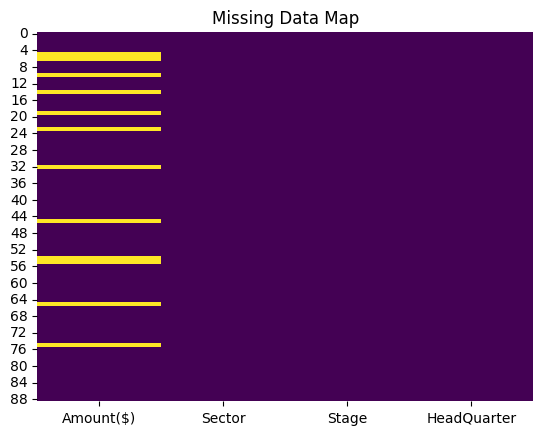

In [92]:
# creating a subset of the relevant columns
rele_col = ['Amount($)', 'Sector', 'Stage', 'HeadQuarter']

# creating a dataframe with missing value indicator 
missing_indicator_df = df2[rele_col].isnull()

# below we are creating a missing data heat map
sns.heatmap(missing_indicator_df, cmap='viridis', cbar=False)
plt.title('Missing Data Map')
plt.show()

In [93]:
# we are creating the median of the not missing values 
median_non_null_Amount = df2['Amount($)'].dropna()

median_Amount = median_non_null_Amount.median() 

# below we are filling in the missing values with the median 
df2['Amount($)'].fillna(median_Amount, inplace=True)

In [94]:
df2['Amount($)'].isnull().sum() # checking for null values

0

### Clean Categorical Data

In [95]:
# Clean Company Name column
df2['Company/Brand'] = df2['Company/Brand'].str.strip()  # Remove leading and trailing spaces
df2['Company/Brand'] = df2['Company/Brand'].str.title()  # Standardize capitalization

# Clean Company Name column
df2['Sector'] = df2['Sector'].str.strip()  # Remove leading and trailing spaces
df2['Sector'] = df2['Sector'].str.title()  # Standardize capitalization

# Clean About Company column
df2['What it does'] = df2['What it does'].str.strip()  # Remove leading and trailing spaces

# Function to handle special characters or encoding issues
def clean_text(text):
    # Remove special characters using regex
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return cleaned_text

# Apply the clean_text function to the About Company column
df2['What it does'] = df2['What it does'].apply(clean_text)

In [96]:
# Dropping the columns that are not important to our analysis

df2.drop(columns=['Founded','Founders','Investor'], inplace=True)

In [97]:
df2.insert(6,"Funding Year", 2019) # here we are inserting a new column to keep track of the data set after combining 

In [98]:
# below we are renaming the columns to enure consistency 

df2.rename(columns = {'Company/Brand':'Company',
                        'HeadQuarter':'Location',
                        'Amount($)':'Amount',
                        'What it does':'About'},
             inplace = True)

In [99]:
df2.isnull().sum()

Company         0
Location        0
Sector          0
About           0
Amount          0
Stage           0
Funding Year    0
dtype: int64

In [100]:
df2.head() # let's comfirm the data set by looking at the head before we save it 

,Company,Location,Sector,About,Amount,Stage,Funding Year
0,Bombay Shaving,Gurugram,Ecommerce,Provides a range of male grooming products,6300000.0,Series A,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topicbased j...,150000000.0,Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games,28000000.0,Fresh funding,2019
3,Homelane,Chennai,Interior Design,Provides interior designing solutions,30000000.0,Series D,2019
4,Nu Genes,Telangana,Agritech,It is a seed company engaged in production pro...,6000000.0,Series A,2019


In [101]:
df2.to_csv('df_2019.csv', index=False) # here we are saving the set and naming it df_19.csv

# 2020 Data

In [102]:
df3.head() #showing the first five rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [103]:
df3.shape

(1055, 10)

In [104]:
df3.columns #accessing specific columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [105]:
df3.info() # Get inforamation about the df3 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [106]:
df3.describe(include='object').T # Getting general descriptive statistics of the data2 dataFrame

,count,unique,top,freq
Company_Brand,1055,905,Nykaa,6
HeadQuarter,961,77,Bangalore,317
Sector,1042,302,Fintech,80
What_it_does,1055,990,Provides online learning classes,4
Founders,1043,927,Falguni Nayar,6
Investor,1017,848,Venture Catalysts,20
Stage,591,42,Series A,96
column10,2,2,Pre-Seed,1


In [107]:
df3.describe() # Getting general descriptive statistics for float columns

,Founded,Amount
count,842.000000,8.010000e+02
mean,2015.363420,1.130430e+08
std,4.097909,2.476635e+09
min,1973.000000,1.270000e+04
25%,2014.000000,1.000000e+06
50%,2016.000000,3.000000e+06
75%,2018.000000,1.100000e+07
max,2020.000000,7.000000e+10


In [108]:
df3.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

#### Handling Duplicated Data

In [109]:
# checking for duplicated values 

columns_to_check3 = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']
for column2 in columns_to_check3:
    has_duplicates2 = df3[column2].duplicated().any()
    print(f'{column2}: {has_duplicates2}')

Company_Brand: True
Founded: True
HeadQuarter: True
Sector: True
What_it_does: True
Founders: True
Investor: True
Amount: True
Stage: True


In [110]:
# below we are dropping the duplicates rows 

df3.drop_duplicates(subset=['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage'], inplace=True)

#### Handling Categorical Data

## HeadQuarter Column

In [111]:
df3['HeadQuarter'].unique() #displaying the unique values found in the 'HeadQuarter' column.

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [112]:
df3[df3['HeadQuarter'].isnull()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
87,Habitat,2016.0,None,EdTech,"Habitat, a social learning edtech platform for...","Rohit Pande, Shikhar Sachan","Unitus Ventures, Whiteboard Capital",600000.0,Seed,None
92,Raskik,2019.0,None,Fusion beverages,All new fusion-flavour fruit juices with the g...,"Vikas Chawla, Abhay Parnerkar, Satyajit Ram","Venture Catalysts, 9Unicorns",1000000.0,Pre-series A,None
95,Pravasirojgar,2020.0,None,Job portal,Initiative for blue-collar job workers,Sonu Sood,GoodWorker.,33000000.0,None,None
121,Kaagaz Scanner,2020.0,None,Scanning app,Kaagaz Scanner is the Indian replacement to ba...,"Snehanshu Gandhi, Gaurav Shrishrimal",Pravega Ventures,575000.0,None,None
487,Exprs,2018.0,None,Nano Distribution Network,"Nano Distribution Centres, enabling seamless c...","Srinivas Madhavam, Srikanth Rajashekhar, Rahul...","Sweta Rau, Sandeep Kapoor",5660000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1035,Byju,2011.0,None,Edtech,Provides online learning classes,Byju Raveendran,Tiger Global,200000000.0,None,None
1041,Shiksha,2008.0,None,Edtech,It makes college selection easy for students l...,Kanav Sachdeva,Mumbai Angels Network,181000.0,None,None
1045,XpressBees,2015.0,None,Logistics,Provides end to end supply chain solutions,"Supam Maheshwari, Amitava Saha",Alibaba,10000000.0,None,None
1047,Wealth Bucket,2018.0,None,Fintech,An online platform for mutual fund investments,"Himanshu Jain, Pulkit Jain","NorthStar, Vinod Khatumal",3000000.0,None,None


In [113]:
# we are replacing the data in the Headquater by researching from google

df3.loc[df3['Company_Brand'] == 'Habitat', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Wealth Bucket', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'EpiFi', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'XpressBees', 'HeadQuarter'] = 'Pune'
df3.loc[df3['Company_Brand'] == 'Shiksha', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Byju', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Zomato', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Rentomojo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Mamaearth', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'HaikuJAM', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Testbook', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Techbooze', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Rheo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Klub', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'TechnifyBiz', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Aesthetic Nutrition', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Gamerji', 'HeadQuarter'] = 'Ahmedabad'
df3.loc[df3['Company_Brand'] == 'Phenom People', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Teach Us', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Invento Robotics', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Kristal AI', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Samya AI', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Skylo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'SmartKarrot', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Park+', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'LogiNext', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'MoneyTap', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'RACEnergy', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Oye! Rickshaw', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Fleetx', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Raskik', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Pravasirojgar', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Kaagaz Scanner', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Exprs', 'HeadQuarter'] = 'Madhapur'
df3.loc[df3['Company_Brand'] == 'Verloop.io', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Otipy', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Daalchini', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Suno India', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Eden Smart Homes', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Bijnis', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Oziva', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Yulu', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Peppermint', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Jiffy ai', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Postman', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'F5', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Myelin Foundry', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'iNurture Education', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Credgencies', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Vahak', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Illumnus', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Juicy Chemistry', 'HeadQuarter'] = 'Coimbatore'
df3.loc[df3['Company_Brand'] == 'Shiprocket', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Phable', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Generic Aadhaar', 'HeadQuarter'] = 'Thane'
df3.loc[df3['Company_Brand'] == 'Nium', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'DailyHunt', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Pedagogy', 'HeadQuarter'] = 'Ahmedabad'
df3.loc[df3['Company_Brand'] == 'Sarva', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'NIRA', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Indusface', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Morning Context', 'HeadQuarter'] = 'Singapore'
df3.loc[df3['Company_Brand'] == 'Savvy Co op', 'HeadQuarter'] = 'New York'
df3.loc[df3['Company_Brand'] == 'BLive', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Toch', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Setu', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Rebel Foods', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Amica', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Fingerlix', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Zupee', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'DeHaat', 'HeadQuarter'] = 'Patna'
df3.loc[df3['Company_Brand'] == 'Akna Medical', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'RaRa Delivery', 'HeadQuarter'] = 'Jakarta'
df3.loc[df3['Company_Brand'] == 'Obviously AI', 'HeadQuarter'] = 'San Francisco'
df3.loc[df3['Company_Brand'] == 'CoinDCX', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'NuNu TV', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Fintso', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Smart Coin', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Shop101', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Neeman', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Invideo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'AvalonMeta', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'SmartVizX', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Carbon Clean', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Onsitego', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Nova Credit', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'HempStreet', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Classplus', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Chaayos', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Altor', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'WorkIndia', 'HeadQuarter'] = 'Mumbai'

In [114]:
# below we are reformating the Headquater column with their official values
df3.loc[~df3['HeadQuarter'].str.contains('New Delhi', na=False), 'HeadQuarter'] = df3['HeadQuarter'].str.replace('Delhi', 'New Delhi')
df3["HeadQuarter"] = df3["HeadQuarter"].replace (['Bangalore','Banglore','Bangalore City'], 'Bengaluru')
df3['HeadQuarter'] = df3['HeadQuarter'].replace (['Gurgaon'], 'Gurugram')

In [115]:
df3['HeadQuarter'].isnull().sum()

0

In [116]:
df3[df3['column10'].isin(['Pre-Seed','Seed Round'])] #checking if the values in the 'column10' column match either 'Pre-Seed' or 'Seed Round'.

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
611,Walrus,2019.0,Bengaluru,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",1700000.0,Seed Round,Seed Round


## Sector Column

In [117]:
df3['Sector'].unique() # ckecking for unique values in the Sector column 

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [118]:
df3[df3['Sector'].isnull()] # checking for null values

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
518,Text Mercato,2015.0,Bengaluru,None,Cataloguing startup that serves ecommerce plat...,"Kiran Ramakrishna, Subhajit Mukherjee",1Crowd,649600.0,Series A,None
569,Magicpin,2015.0,Gurugram,None,"It is a local discovery, rewards, and commerce...","Anshoo Sharma, Brij Bhushan",Samsung Venture Investment Corporation,7000000.0,Series D,None
687,Leap Club,NaN,Gurugram,None,Community led professional network for women,"Ragini Das, Anand Sinha","Whiteboard Capital, FirstCheque, Artha India V...",340000.0,Pre seed round,None
699,Juicy Chemistry,2014.0,Coimbatore,None,It focuses on organic based skincare products,Pritesh Asher,Akya Ventures,650000.0,Series A,None
707,Magicpin,2015.0,Gurugram,None,"It is a local discovery, rewards, and commerce...","Anshoo Sharma, Brij Bhushan",Lightspeed Venture Partners,3879000.0,None,None
732,Servify,NaN,Mumbai,None,It is a technology company which serves as a p...,Sreevathsa Prabhakar,Barkawi,250000.0,None,None
746,Wagonfly,2018.0,Bengaluru,None,Contactless shopping and delivery experience b...,Raghavendra Prasad,Investment Trust of India,500000.0,None,None
763,DrinkPrime,NaN,Bengaluru,None,Water purifier subscription service,"Manas Ranjan Hota, Vijender Reddy","Abhishek Goyal, Bharat Jaisinghani, FirstCheque",NaN,Seed Round,None
809,Kitchens Centre,2019.0,New Delhi,None,Offers solutions to cloud kitchens by providin...,Lakshay Jain,AngelList India,500000.0,Seed Round,None
918,Innoviti,NaN,Bengaluru,None,Digital payments solutions company,Rajeev Agrawal,FMO,5000000.0,None,None


In [119]:
# we replacing the null values with the actual data by searching from google

df3.loc[df3['Company_Brand'] == 'Text Mercato', 'Sector'] = 'E-commerce Technology'
df3.loc[df3['Company_Brand'] == 'Magicpin', 'Sector'] = 'Hyperlocal Services'
df3.loc[df3['Company_Brand'] == 'Leap Club', 'Sector'] = 'Professional Networking'
df3.loc[df3['Company_Brand'] == 'Juicy Chemistry', 'Sector'] = 'Organic Skincare'
df3.loc[df3['Company_Brand'] == 'Servify', 'Sector'] = 'Technology Services'
df3.loc[df3['Company_Brand'] == 'Wagonfly', 'Sector'] = 'Retail Technology'
df3.loc[df3['Company_Brand'] == 'DrinkPrime', 'Sector'] = 'Water Technology'
df3.loc[df3['Company_Brand'] == 'Kitchens Centre', 'Sector'] = 'Food Service Infrastructure'
df3.loc[df3['Company_Brand'] == 'Innoviti', 'Sector'] = 'Fintech'
df3.loc[df3['Company_Brand'] == 'Brick&Bolt', 'Sector'] = 'Construction and Real Estate'
df3.loc[df3['Company_Brand'] == 'Toddle', 'Sector'] = 'EdTech'
df3.loc[df3['Company_Brand'] == 'HaikuJAM', 'Sector'] = 'EdTech'

In [120]:
df3['Sector'].isnull().sum() # checking to confirm the null values

0

## Stage Column

In [121]:
df3['Stage'].unique() # checking the unique values in the data set

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

FOR NOW LET'S REPLACE ALL THE 'NONE' WITH NAN VALUES 

In [122]:
df3['Stage'] = df3['Stage'].astype(str)
df3['Stage'].replace('None', np.nan, inplace=True) # here we convert all the values to string so we can replace all the None values


In [123]:
most_frequent_stage = df3['Stage'].mode()[0]
df3['Stage'].fillna(most_frequent_stage, inplace=True)

In [124]:
df3['Stage'].isnull().sum() # CONFIRMING THE NULL VALUES AGAIN

0

In [125]:
df3['Stage'].unique() # now we confirm the stage column again

array(['Series A', 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series',
       'Series C', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

### Check for inconsistencies in the Dataset

In [126]:
# checking for '-' symbol within the columns
df3_to_check_colomns = ['Company_Brand','HeadQuarter', 'Sector', 'What_it_does','Stage','Amount']
for col in df3_to_check_colomns:
    dash_symbols = df3[col].astype(str).str.contains('—').any()
    print(f"{col}: {dash_symbols}")

Company_Brand: False
HeadQuarter: False
Sector: False
What_it_does: False
Stage: False
Amount: False


## Amount Column

In [127]:
df3["Amount"].head() # Calculate the frequency count of unique values in the "Amount" column

0    200000.0
1    100000.0
2         NaN
3    400000.0
4    340000.0
Name: Amount, dtype: float64

In [128]:
df3['Amount'].isnull().sum()

253

In [129]:
len(df3['Amount'])

1052

DEALING WITH MISSING VALUES IN THE AMOUNT COLUMN IN DATA SET 2020

In [130]:
#creating the contingency table

conting_table_3 = pd.crosstab(df3['Sector'], df3['Amount'].isnull())

In [131]:
# below we are performing the chi-square test
chi2_3, p_value_3, _,_ = chi2_contingency(conting_table_3)
chi2_3
p_value_3

0.1839099738666176

In [132]:
# we are interpretting the chi-sqaure test 
significance_level_3 = 0.05

if p_value_3 < significance_level_3:
    print("There is a significant association between the missing values in the 'Amount' column and the 'Sector' column.")
else:
    print("There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.")

There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.


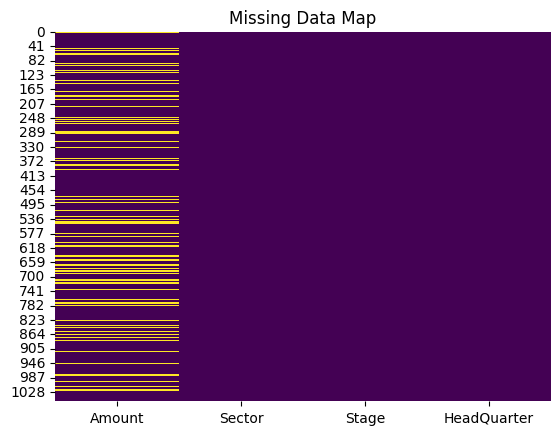

In [133]:
# creating a subset of the relevant columns
rele_col = ['Amount', 'Sector', 'Stage', 'HeadQuarter']

# creating a dataframe with missing value indicator 
missing_indicator_df = df3[rele_col].isnull()

# below we are creating a missing data heat map
sns.heatmap(missing_indicator_df, cmap='viridis', cbar=False)
plt.title('Missing Data Map')
plt.show()

In [134]:
# we are creating the median of the not missing values 
median_non_null_Amount = df3['Amount'].dropna()

median_Amount = median_non_null_Amount.median() 

# below we are filling in the missing values with the median 
df3['Amount'].fillna(median_Amount, inplace=True)

In [135]:
df3['Amount'].head()

0     200000.0
1     100000.0
2    3000000.0
3     400000.0
4     340000.0
Name: Amount, dtype: float64

In [136]:
df3['Amount'].isnull().sum() # checking for null values

0

In [137]:
df3 = df3.drop(['column10','Founded','Founders','Investor'], axis=1) #dropping specific columns from the DataFrame 

In [138]:
df3.insert(6,"Funding Year", 2020) # inserting a new column 'funding Year 2021' to keep track of the data sets when combining

In [139]:
new_column_names = {'Company_Brand': 'Company', 'What_it_does': 'About', 'HeadQuarter': 'Location'} # Renaming columns
df3 = df3.rename(columns=new_column_names)

In [140]:
df3.isnull().sum() # checking if any of the column still have nan

Company         0
Location        0
Sector          0
About           0
Amount          0
Stage           0
Funding Year    0
dtype: int64

In [141]:
df3.head() # checking the head of the data to confirm before saving the data 

,Company,Location,Sector,About,Amount,Stage,Funding Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,Series A,2020
1,Krayonnz,Bengaluru,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed,2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,3000000.0,Pre-seed,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,Series A,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,Series A,2020


In [142]:
# saving the clean data set

df3.to_csv('df_2020.csv', index=False)

# 2021 Data

In [143]:
df4.head() #showing the first five rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [144]:
df4.shape #understanding the size of your DataFrame

(1209, 9)

In [145]:
df4.columns #retrieving the column names of the DataFrame

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [146]:
df4.info() #providing a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [147]:
df4.describe(include='object').T #providing descriptive statistics for columns of object data type in the DataFrame

,count,unique,top,freq
Company_Brand,1209,1033,BharatPe,8
HeadQuarter,1208,70,Bangalore,426
Sector,1209,254,FinTech,122
What_it_does,1209,1143,BharatPe develops a QR code-based payment app ...,4
Founders,1205,1095,"Ashneer Grover, Shashvat Nakrani",7
Investor,1147,937,Inflection Point Ventures,24
Amount,1206,278,$Undisclosed,73
Stage,781,31,Seed,246


In [148]:
df4.isnull().sum() # looking for missing values in dataFrame

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

#### Handling Duplicated Data

In [149]:
#checking for duplicate values in each column of the DataFrame df4
columns_to_check4 = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']

for column4 in columns_to_check4:
    has_duplicates4 = df4[column4].duplicated().any()
    print(f'{column4}: {has_duplicates4}')

Company_Brand: True
Founded: True
HeadQuarter: True
Sector: True
What_it_does: True
Founders: True
Investor: True
Amount: True
Stage: True


In [150]:
#removing any rows that have the same values in all the specified columns.
df4.drop_duplicates(subset=['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage'], inplace=True)

## Handling Categorical Data

## HeadQuarter Column

In [151]:
df4['HeadQuarter'].unique() # here we are looking at the unique values in the column 

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [152]:
#using a filter to get all the miss match values in the HeadQuater column

df4[df4['HeadQuarter'].isin(['Online Media\t#REF!', 'Pharmaceuticals\t#REF!','Computer Games','Information Technology & Services','Food & Beverages'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None
1176,Peak,2014.0,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [153]:
#assigning specific values to HeadQuarter", "Amount", "Stage in the DataFrame

df4.loc[df4["Company_Brand"] == "FanPlay", ["HeadQuarter", "Amount", "Stage"]] = ["New Delhi", "$1200000","Pre-Series A"]
df4.loc[df4["Company_Brand"] == "FanPlay"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,New Delhi,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,Pre-Series A


In [154]:
#assigning specific values to HeadQuarter", "Amount", "Stage in the DataFrame

df4.loc[df4["Company_Brand"] == "MasterChow", ["HeadQuarter", "Sector"]] = ["New Delhi", "Food & Beverages"]
df4.loc[df4["Company_Brand"] == "MasterChow"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
241,MasterChow,2020.0,New Delhi,Food & Beverages,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [155]:
# here we are repositioning the values into their correct columns

df4.loc[df4["Company_Brand"] == "Fullife Healthcare", ["HeadQuarter","Sector","What_it_does","Investor", "Amount", "Stage"]] = ["Mumbai","Pharmaceuticals","Primary Business is Development and Manufactur...","Varun Khanna", "$22000000","Series C"]
df4.loc[df4["Company_Brand"] == "Fullife Healthcare"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
242,Fullife Healthcare,2009.0,Mumbai,Pharmaceuticals,Primary Business is Development and Manufactur...,Morgan Stanley Private Equity Asia,Varun Khanna,$22000000,Series C


In [156]:
# getting the all the data points that matches the company_Brand name 'Peak'

df4.loc[df4["Company_Brand"] == "Peak", ["HeadQuarter", "Sector"]] = ["New Delhi", "Information Technology & Services"]
df4.loc[df4["Company_Brand"] == "Peak"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1176,Peak,2014.0,New Delhi,Information Technology & Services,Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [157]:
# getting the all the data points that matches the company_Brand name 'Sochcast'

df4.loc[df4["Company_Brand"] == "Sochcast", ["HeadQuarter", "Sector",'What_it_does','Founders','Investor',"Amount",'Stage']] = ['Bengaluru', 'Online Media','Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience','CA Harvinderjit Singh Bhatia, Garima Surana','Vinners, Raj Nayak, Amritaanshu Agrawal',"$Undisclosed",'Angel funding']
df4.loc[df4["Company_Brand"] == "Sochcast"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1100,Sochcast,2020.0,Bengaluru,Online Media,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,Angel funding


In [158]:
df4[df4['HeadQuarter'].isnull()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
29,Vidyakul,2018.0,None,EdTech,Vidyakul is an vernacular e-learning platform ...,"Raman Garg, Tarun Saini","JITO Angel Network, SOSV","$500,000",Seed


In [159]:
#Fill the nan
df4.loc[df4['Company_Brand'] == 'Vidyakul', 'HeadQuarter'] = 'Gurugram'

In [160]:
# From obersavtion, there is use of official and unofficial names of certain cities.
# The incorrect names need to be rectified for correct analysis, eg A city with more than one name.
df4.loc[~df4['HeadQuarter'].str.contains('New Delhi', na=False), 'HeadQuarter'] = df4['HeadQuarter'].str.replace('Delhi', 'New Delhi')
df4['HeadQuarter'] = df4['HeadQuarter'].replace (['Bangalore','Bangalore City'], 'Bengaluru')
df4['HeadQuarter'].replace('Gurugram\t#REF!','Gurugram',inplace =True, regex=True)

In [161]:
df4['HeadQuarter'].unique() # here we are looking at the unique value of the Sector column 

array(['Bengaluru', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', 'Small Towns, Andhra Pradesh',
       'Goa', 'Rajsamand', 'Ranchi', 'Faridabad, Haryana', 'Gujarat',
       'Pune', 'Thane', 'Cochin', 'Noida', 'Chandigarh', 'Gurgaon',
       'Vadodara', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore',
       'Powai', 'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna',
       'Samsitpur', 'Lucknow', 'Telangana', 'Silvassa',
       'Thiruvananthapuram', 'Faridabad', 'Roorkee', 'Ambernath',
       'Panchkula', 'Surat', 'Coimbatore', 'Andheri', 'Mangalore',
       'Telugana', 'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji',
       'Satara', 'Orissia', 'Jodhpur', 'New York', 'Santra',
       'Mountain View, CA', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Kochi', 'London', 'The Nilgiris',
       'Gandhinagar'], dtype=object)

In [162]:
df4['HeadQuarter'].isnull().sum()

0

## Sector Column

In [163]:
df4['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [164]:
# here we are updating this Row 'MoEVing'

df4.loc[df4["Company_Brand"] == "MoEVing", ["Sector",'What_it_does','Founders','Investor','Amount','Stage']] = [
'Electric Mobility',"MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.",
'Vikash Mishra, Mragank Jain','Anshuman Maheshwary, Dr Srihari Raju Kalidindi','$5000000','Seed']
df4.loc[df4["Company_Brand"] == "MoEVing"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
257,MoEVing,2021.0,Gurugram,Electric Mobility,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed


## Stage Column

In [165]:
df4["Stage"].unique() # getting the unique values in this column 

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Pre-Series A', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Angel funding',
       'Series I'], dtype=object)

In [166]:
#using a filter to get all the inconsistencies in the HeadQuater column
df4[df4["Stage"].isin(['$6000000', '$300000','$1000000'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,None,$6000000
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000


In [167]:
# repositioning the values to their respective columns  

df4.loc[df4["Company_Brand"] == "MYRE Capital", ["Amount", "Stage"]] = ["6000000",np.nan]
df4.loc[df4["Company_Brand"] == "MYRE Capital"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,6000000,NaN


In [168]:
# repositioning the values to their respective columns
df4.loc[df4["Company_Brand"] == "Little Leap", ["Amount", "Stage"]] = ["300000",'Seed']
df4.loc[df4["Company_Brand"] == "Little Leap"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,300000,Seed


In [169]:
 # repositioning the values to their respective columns
df4.loc[df4["Company_Brand"] == "BHyve", ["Amount", "Stage"]] = ["300000",'Angel']
df4.loc[df4["Company_Brand"] == "BHyve"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",300000,Angel


In [170]:
# repositioning the values to their respective columns
df4.loc[df4["Company_Brand"] == "Saarthi Pedagogy", ["Amount", "Stage"]] = ["1000000",'Seed']
df4.loc[df4["Company_Brand"] == "Saarthi Pedagogy"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,1000000,Seed


In [171]:
df4["Stage"].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Pre-Series A', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Angel', 'Early seed', 'Series D1', nan,
       'Seies A', 'Pre-series', 'Series A2', 'Angel funding', 'Series I'],
      dtype=object)

## Amount Column

In [172]:
df4["Amount"].unique() # getting unique values 

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [173]:
# checking if these specific values are present in the amount column 
df4[df4['Amount'].isin([ 'Seed','Pre-series A'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,None


In [174]:
# getting the row that matches the Amount 
# repositioning the values to their respective columns

df4.loc[df4["Company_Brand"] == "Godamwale", ["Amount", "Stage", "Investor"]] = ["$1000000", "Seed",np.nan]
df4.loc[df4["Company_Brand"] == "Godamwale"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",NaN,$1000000,Seed


In [175]:
df4.loc[df4["Company_Brand"] == "AdmitKard", ["Amount", "Stage", "Investor"]] = [
    "$1000000", "Pre-series A",np.nan]
df4.loc[df4["Company_Brand"] == "AdmitKard"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,$1000000,Pre-series A


In [176]:
# Cleaning the Amounts column & removing the currency symbol in df4
df4['Amount'] = df4['Amount'].astype(str).str.replace('[\₹$,]', '', regex=True)
df4['Amount'].replace(['Undisclosed', '$undisclosed', 'None', 'undisclosed', '$Undisclosed'], np.nan, inplace=True, regex=True)
df4['Amount'].replace([',', '—', '$'], ['', 0, ''], inplace=True, regex=True)
df4['Amount'].replace('', np.nan, inplace=True)  # Replace empty strings with NaN
df4['Amount'].replace(0, np.nan, inplace=True)   # Replace 0 with NaN
df4['Amount'].replace({None: np.nan}, inplace=True)

In [177]:
df4['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', nan, '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '440000

In [178]:
df4['Amount'] = df4['Amount'].astype(float)
type(df4['Amount'][0])   # we are converting to float 

numpy.float64

In [179]:
null_values_Amount4 = df4['Amount'].isnull().sum() # here we are comfirming for null values
print(null_values_Amount4) 

141


In [180]:
len(df4['Amount'])

1190

NOW LET'S FIND THE PERCENTAGE OF NULL VALUES TO THE THAT OF THE WHOLE 
AMOUNT COLUMN 
this will help us to understand and appreciate the impact of the null values in the Amount column

In [181]:
# Finding the percentage of null values

Amnt_null_perc = (null_values_Amount4 / len(df4['Amount'])) * 100
Amnt_null_perc

11.848739495798318

In [182]:
amount_stats = df4['Amount'].describe()
pd.options.display.float_format = '{:,.2f}'.format
print(amount_stats)

count             1,049.00
mean        171,218,804.58
std       4,631,144,722.04
min              10,000.00
25%           1,000,000.00
50%           3,500,000.00
75%          15,000,000.00
max     150,000,000,000.00
Name: Amount, dtype: float64


In [183]:
#creating the contingency table
conting_table_3 = pd.crosstab(df4['Sector'], df4['Amount'].isnull())

In [184]:
# below we are performing the chi-square test
chi2_3, p_value_3, _,_ = chi2_contingency(conting_table_3)
chi2_3
p_value_3

0.17913170329298025

In [185]:
# we are interpretting the chi-sqaure test 
significance_level_3 = 0.05

if p_value_3 < significance_level_3:
    print("There is a significant association between the missing values in the 'Amount' column and the 'Sector' column.")
else:
    print("There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.")

There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.


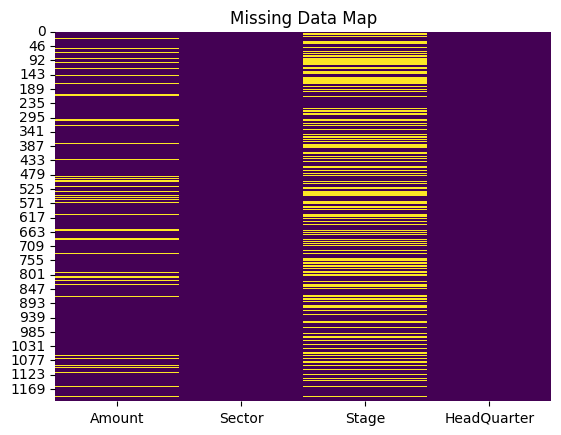

In [186]:
# creating a subset of the relevant columns
rele_col = ['Amount', 'Sector', 'Stage', 'HeadQuarter']

# creating a dataframe with missing value indicator 
missing_indicator_df = df4[rele_col].isnull()

# below we are creating a missing data heat map
sns.heatmap(missing_indicator_df, cmap='viridis', cbar=False)
plt.title('Missing Data Map')
plt.show()

In [187]:
# we are creating the median of the not missing values 
median_non_null_Amount = df4['Amount'].dropna()

median_Amount = median_non_null_Amount.median() 

# below we are filling in the missing values with the median 
df4['Amount'].fillna(median_Amount, inplace=True)

In [188]:
df4['Amount'].isnull().sum() # checking for null values

0

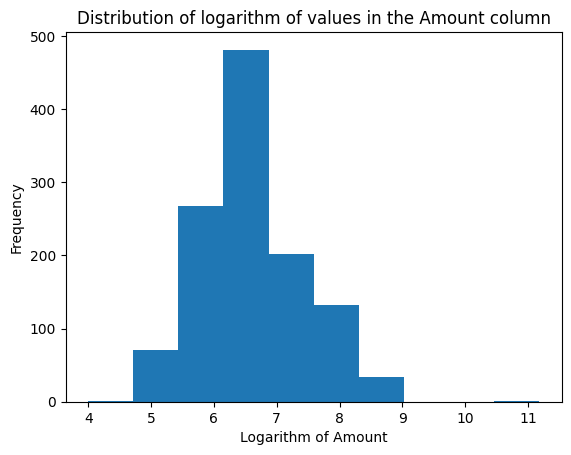

In [189]:
# first we will use the distribution shape by the help of a histogram 
# below we are plotting the histogram 

# Apply logarithmic transformation to the data
# Filter out non-positive and missing values
valid_amounts = df4['Amount'][df4['Amount'] > 0].dropna()

# Apply logarithmic transformation to the filtered values
log_amount = np.log10(valid_amounts)

# Plot the histogram using logarithmic scale
plt.hist(log_amount, bins=10)
plt.xlabel('Logarithm of Amount')
plt.ylabel('Frequency')
plt.title('Distribution of logarithm of values in the Amount column')
plt.show()

NOW LET'S DEAL WITH NULL VALUES IN THE STAGE COLUMN 

In [190]:
null_stage_4 = df4['Stage'].isnull().sum()  # checking for null values in the stage column 
null_stage_4

417

In [191]:
null_stage_4 = df4['Stage'].isnull().sum()
perce_null_stage4 = (null_stage_4 / len(df4['Stage'])) * 100 # here we want to know the percentage of the null values in the stage column 
perce_null_stage4

35.042016806722685

In [192]:
df4.rename(columns = {'Company_Brand':'Company',
                        'HeadQuarter':'Location',
                        'What_it_does':'About'},
             inplace = True)

In [193]:
df4.loc[df4['Company'] == 'upGrad', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Urban Company', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Comofi Medtech', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Smart Joules', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Miko', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'M1xchange', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Do Your Thng', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'LegitQuest', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Fantasy Akhada', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Speciale Invest', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Meesho', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Elevar', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Curefoods', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Camp K12', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Defy', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Homversity', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Loop Health', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Smartstaff', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Hyperface', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Melorra', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'Onato', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Mestastop Solutions', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'MergerDomo', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Trell', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Homeville', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Ola Electric', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Delhivery', 'Stage'] = 'Series F'
df4.loc[df4['Company'] == 'Upgame', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'byteXL', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'EventBeep', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'GameEon Studios', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Tessolve', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'EF Polymer', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'LearnVern', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Beldara', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Oye Rickshaw', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'OfBusiness', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'CareerLabs', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Studio Sirah', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == '1Bridge', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'TartanSense', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Bewakoof', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Elda Health', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Ruptok', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == "O' Be Cocktails", 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Hike', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'House of Kieraya', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'DrinkPrime', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SATYA MicroCapital', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'CreatorStack', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Rage Coffee', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Klub', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Stellaris Venture Partners', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Celcius', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'UrbanMatrix Technologies', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Evenflow Brands', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Atomberg', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'ShopMyLooks', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Veefin', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'BangDB', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'O’ Be Cocktails', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'OneCard', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Hubhopper', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'Avataar Ventures', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Codingal', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Junio', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'MPL', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Bombay Shaving Company', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'MFine', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Darwinbox', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'SSA Finserv', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Pariksha', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Devic Earth', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Pocket Aces', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Biocon Biologics', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Biconomy', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Bandhoo', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Mamaearth', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Inspacco', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'GODI Energy', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Lenskart', 'Stage'] = 'Series E'
df4.loc[df4['Company'] == 'Clensta', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Polygon', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Thingsup', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'TRDR', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SuperBottoms', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Wingreens Farms', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Bombay Hemp Company', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Zenpay Solutions', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Visit Health', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Zetwerk', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Wiingy', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Arcana', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Duroflex', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Tvasta', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Vakilsearch', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'PumPumPum', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Sterling Accuris Wellness', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Braingroom', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Vegrow', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Automovill', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Bella Vita Organic', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'SmartCoin', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'MYSUN', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Square Yards', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Slang Labs', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SMOOR', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'UrbanKisaan', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SpEd@home', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Now&Me', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Capital Float', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'PazCare', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'MicroDegree', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Plutomen', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Grinntech', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Navars', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Slice', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'CredR', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Dream Sports', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Annapurna Finance', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Purplle', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Nazara Technologies', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Svasti Microfinance', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'BlackSoil NBFC', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Kinara Capital', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'AMPM', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Design Cafe', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'eShipz', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Atomberg Technologies', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Peppermint', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'CredR', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Dream Sports', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Annapurna Finance', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Purplle', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Nazara Technologies', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Svasti Microfinance', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'BlackSoil NBFC', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Kinara Capital', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'AMPM', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Design Cafe', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'eShipz', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Atomberg Technologies', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Peppermint', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Spintly', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'ShopSe', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'ShareChat', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Safexpay', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Advantage Club', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SuperGaming', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SleepyCat', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Ultrahuman', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Yojak', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Navia Life Care', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Locale.ai', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Whiz League', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'CHARGE+ZONE', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'PingoLearn', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Practically', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Keka HR', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Marquee Equity', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'GoTo', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Furlenco', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Chalo', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Udaan', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'MyGlamm', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Inshorts', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Bikry app', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'The Ayurveda Co', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Furlenco', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Rockclimber', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Power Gummies', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Answer Genomics', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Lavado', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'NIRAMAI', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Meddo', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Five Star Finance', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Policybazaar', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'OYO', 'Stage'] = 'Series F'
df4.loc[df4['Company'] == 'Blume Ventures', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'ImaginXP', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Virohan', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Apna.co', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Get My Parking', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'FanCode', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Enthu.ai', 'Stage'] = 'Pre-Seed'
df4.loc[df4['Company'] == 'Zepto', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'TurboHire', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'SatSure', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Leap India', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Better Capital', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Rentomojo', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Kissan Pro', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'VLCC Health Care', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'SUN Mobility', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'The Indus Valley', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'BharatPe', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'BankSathi', 'Stage'] = 'Pre-Seed'
df4.loc[df4['Company'] == 'Auntie Fung', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Sanctum Wealth', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Easiloan', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Boutique Spirit Brands', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Chingari', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Skeps', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Kirana247', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Imagimake', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'goEgoNetwork', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Snack Amor', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Expertrons', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == '1K Kirana Bazaar', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Zupee', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'VerSe Innovation', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'MetroRide', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'PropReturns', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Deciwood', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Skippi Ice Pops', 'Stage'] = 'Pre-Seed'
df4.loc[df4['Company'] == 'Onelife', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'TenderCuts', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Scentials', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Remedico', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'PrepBytes', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'RevFin', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Paperfly', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Bolkar', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Oneiric Gaming', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'iMumz', 'Stage'] = 'Pre-Seed'
df4.loc[df4['Company'] == 'BlackSoil', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Chai Waale', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'JetSynthesys', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Skymet', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'GalaxyCard', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Pankhuri', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Vah Vah!', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Pratilipi', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'Arcatron Mobility', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'KreditBee', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Holisol', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'India Quotient', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Nobel Hygiene', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Instoried', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Homingos', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'NODWIN', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Bijnis', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Clairco', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'BYJU\'S', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Petpooja', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'Arbo Works', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Recordent', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Kaar Technologies', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Phool.co', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Log 9 Materials', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'EV Plugs', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'CredRight', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Leverage Edu', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Enercomp', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'LivQuik Technology', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Tinkerly', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Pine Labs', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Lido Learning', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Taikee', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'boAt', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Onsurity', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Unacademy', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Flo Mobility', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'TheHouseMonk', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Sirona Hygiene', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'Vista Rooms', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Digit Insurance', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Lohum', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Unacademy', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Knocksense', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'DcodeAI', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'ixigo', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Droom', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Oliveboard', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Digit Insurance', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'CoRover', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Powerplay', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'CustomerGlu', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Cell Propulsion', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Chqbook', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'WaterScience', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'BigLeap', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Fourth Partner Energy', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'Safex Chemicals', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'IndiaLends', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'NewLink Group', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'Nexpert', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Max Healthcare', 'Stage'] = 'Series D'
df4.loc[df4['Company'] == 'Ecom Express', 'Stage'] = 'Series C'
df4.loc[df4['Company'] == 'IGL', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Pickright Technologies', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Toplyne', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Wonderchef', 'Stage'] = 'Series B'
df4.loc[df4['Company'] == 'Totality', 'Stage'] = 'Seed'
df4.loc[df4['Company'] == 'Vitra.ai', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'Swiggy', 'Stage'] = 'Series E'
df4.loc[df4['Company'] == 'OTO Capital', 'Stage'] = 'Series A'
df4.loc[df4['Company'] == 'UpScalio', 'Stage'] = 'Series A'

In [194]:
most_frequent_stage = df4['Stage'].mode()[0]
df4['Stage'].fillna(most_frequent_stage, inplace=True)

In [195]:
# Dropping the columns that are not important to our analysis
df4.drop(columns=['Founders','Investor','Founded'], inplace=True)

In [196]:
df4.insert(6,"Funding Year", 2021) # inserting a new column 'funding Year 2021' to keep track of the data sets when combining

In [197]:
# confirming the null values in the amount column again 
df4.isnull().sum()

Company         0
Location        0
Sector          0
About           0
Amount          0
Stage           0
Funding Year    0
dtype: int64

In [198]:
df4.head() # looking at head to comfirm before saving the data 

,Company,Location,Sector,About,Amount,Stage,Funding Year
0,Unbox Robotics,Bengaluru,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"1,200,000.00",Pre-series A,2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"120,000,000.00",Series D,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"30,000,000.00",Series D,2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"51,000,000.00",Series C,2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...","2,000,000.00",Seed,2021


In [199]:
df4.to_csv('df_2021.csv', index=False)

## Concatenate the Cleaned Datasets

In [200]:
#Load the cleaned Datasets
df_18 = pd.read_csv("df_2018.csv")
df_19 = pd.read_csv("df_2019.csv")
df_20 = pd.read_csv("df_2020.csv")
df_21 = pd.read_csv("df_2021.csv")

In [201]:
# Concatenate the data frames
data = pd.concat([df_18, df_19, df_20, df_21])

In [202]:
# Reseting the index of the concatenated data frame
data.to_csv('data_1.csv', index=False)

# Concatenated Dataset

In [203]:
data = pd.read_csv('data.csv')

In [204]:
data.head()

,Company,Sector,Stage,Amount,Location,About,Funding Year
0,Thecollegefever,Brand Marketing,Seed and Pre-Seed Funding,"250,000.00",Bengaluru,TheCollegeFever is a hub for fun fiesta and fr...,2018
1,Happy Cow Dairy,Agriculture,Seed and Pre-Seed Funding,"584,000.00",Mumbai,A startup which aggregates milk from dairy far...,2018
2,Myloancare,Credit,Early Stage Funding,"949,000.00",Gurugram,Leading Online Loans Marketplace in India,2018
3,Payme India,Financial Services,Angel Funding,"2,000,000.00",Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed and Pre-Seed Funding,"1,300,000.00",Hyderabad,Eunimart is a one stop solution for merchants ...,2018


In [205]:
data.shape

(2856, 7)

In [206]:
data.columns

Index(['Company', 'Sector', 'Stage', 'Amount', 'Location', 'About',
       'Funding Year'],
      dtype='object')

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       2856 non-null   object 
 1   Sector        2856 non-null   object 
 2   Stage         2856 non-null   object 
 3   Amount        2856 non-null   float64
 4   Location      2856 non-null   object 
 5   About         2856 non-null   object 
 6   Funding Year  2856 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 156.3+ KB


In [208]:
data.isnull().sum()

Company         0
Sector          0
Stage           0
Amount          0
Location        0
About           0
Funding Year    0
dtype: int64

In [209]:
data.describe(include='object').T

,count,unique,top,freq
Company,2856,2240,BharatPe,10
Sector,2856,609,FinTech,263
Stage,2856,14,Early Stage Funding,1169
Location,2856,134,Bengaluru,963
About,2856,2711,Provides online learning classes,5


In [210]:
data.Location.unique()

array(['Bengaluru', 'Mumbai', 'Gurugram', 'Noida', 'Hyderabad', 'Kalkaji',
       'New Delhi', 'India', 'Hubli', 'Chennai', 'Mohali', 'Kolkata',
       'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana',
       'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum',
       'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur', 'Trivandrum',
       'Ernakulam', 'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore',
       'Ghaziabad', 'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal',
       'Coimbatore', 'Worli', 'Alleppey', 'Chandigarh', 'Guindy',
       'Lucknow', 'Telangana', 'Marlborough', 'London', 'San Francisco',
       'California', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli, Tamilnadu', 'Singapore', 'Gujarat', 'Kerala',
       'Jaipur, Rajastan', 'Frisco, Texas, United States',
       'Dhingsara, Haryana', 'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California

In [211]:
data['Stage'].unique()

array(['Seed and Pre-Seed Funding', 'Early Stage Funding',
       'Angel Funding', 'Later Stage Funding', 'Private Equity', 'Grant',
       'Debt Financing', 'Growth Stage Funding', 'Corporate Funding',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Miscellaneous', 'Bridge Funding'], dtype=object)

In [212]:
funding_series_grouping = {
    "Seed and Pre-Seed Funding": [
        "Seed", "Pre-Seed", "Pre-seed", "Seed+", "Seed A", "Seed fund",
        "Seed Round", "Seed Investment", "Seed Round & Series A",
        "Seed Round, Series A", "Seed funding", "Seed fund", "Seed round", "Seed A",
        "Pre-seed Round", "Pre seed Round", "Fresh funding", "Seed+",
        "Pre seed round", "Early seed", 'Seed Funding','Pre-series'
    ],
    "Early Stage Funding": [
        "Series A", "Series A-1", "Series A2", "Series A1", "Pre-series A",
        "Pre-Series A", "Pre series A", "Pre-Series A1", "Pre series A1",
        "Pre-series A, Series A", "Pre Series A", "Pre-series A1", "Pre-series A1",
        "Series A2", "Seies A", "Pre-Series A", "Pre-series A1", 'Pre- series A','Series A Funding','Post series A'
    ],
    "Angel Funding": [
        "Angel", "Angel Round", "Angel funding", "Angel Round"
    ],
    "Later Stage Funding": [
        "Series B", "Series B+", "Series B2", "Series B3", "Series B+",
        "Series B2", "Series B3", "Series B3", "Pre-Series B", "Pre-series B",'Pre series B'
    ],
    "Growth Stage Funding": [
        "Series C", "Series C, D", "Series E", "Series E2",
        "Series F", "Series F1", "Series G", "Series H",
        "Series F1", "Series D", "Pre-series C",'Pre series C','Series D1'
    ],
    "Debt Financing": [
        "Debt Financing", "Debt", "Post-IPO Debt"
    ],
   
    "Corporate Funding": [
        "Corporate Round"
    ],
    "Secondary Market": [
        "Secondary Market"
    ],
    "Post-IPO Equity": [
        "Post-IPO Equity"
    ],
    "Non-equity Assistance": [
        "Non-equity Assistance"
    ],
    "Bridge Funding": [
        "Bridge", "Bridge Round"
    ],
    "Miscellaneous": [
        "Funding Round", "Mid series", "Edge"
    ]
}

# Create a new dictionary to map each individual funding series to its category
series_mapping = {}
for category, series_list in funding_series_grouping.items():
    for series in series_list:
        series_mapping[series] = category

# Replace the 'Stage' values using the new series_mapping dictionary
data['Stage'] = data['Stage'].replace(series_mapping)

In [213]:
data['Stage'].unique()

array(['Seed and Pre-Seed Funding', 'Early Stage Funding',
       'Angel Funding', 'Later Stage Funding', 'Private Equity', 'Grant',
       'Debt Financing', 'Growth Stage Funding', 'Corporate Funding',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Miscellaneous', 'Bridge Funding'], dtype=object)

In [214]:
data['Sector']=data['Sector'].replace('Edtech','EdTech')
data['Sector']=data['Sector'].replace('Fintech','FinTech')

In [215]:
data.head()

,Company,Sector,Stage,Amount,Location,About,Funding Year
0,Thecollegefever,Brand Marketing,Seed and Pre-Seed Funding,"250,000.00",Bengaluru,TheCollegeFever is a hub for fun fiesta and fr...,2018
1,Happy Cow Dairy,Agriculture,Seed and Pre-Seed Funding,"584,000.00",Mumbai,A startup which aggregates milk from dairy far...,2018
2,Myloancare,Credit,Early Stage Funding,"949,000.00",Gurugram,Leading Online Loans Marketplace in India,2018
3,Payme India,Financial Services,Angel Funding,"2,000,000.00",Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed and Pre-Seed Funding,"1,300,000.00",Hyderabad,Eunimart is a one stop solution for merchants ...,2018


## Saving the final changes 

In [216]:
# Reseting the index of the concatenated data frame
data.to_csv('data.csv', index=False)

In [217]:
data = pd.read_csv('data.csv')

In [218]:
data.head()

,Company,Sector,Stage,Amount,Location,About,Funding Year
0,Thecollegefever,Brand Marketing,Seed and Pre-Seed Funding,"250,000.00",Bengaluru,TheCollegeFever is a hub for fun fiesta and fr...,2018
1,Happy Cow Dairy,Agriculture,Seed and Pre-Seed Funding,"584,000.00",Mumbai,A startup which aggregates milk from dairy far...,2018
2,Myloancare,Credit,Early Stage Funding,"949,000.00",Gurugram,Leading Online Loans Marketplace in India,2018
3,Payme India,Financial Services,Angel Funding,"2,000,000.00",Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed and Pre-Seed Funding,"1,300,000.00",Hyderabad,Eunimart is a one stop solution for merchants ...,2018


# Visualizations

### Answering the SMART Questions

## Univariate analysis & Multivariate analysis

### Univariate analysis is a statistical method used to examine and analyze the characteristics and distribution of a single variable in a dataset.

### Multivariate analysis is a statistical technique used to analyze and understand the relationships between multiple variables simultaneously. Unlike univariate analysis, which focuses on a single variable, multivariate analysis examines how different variables interact and influence each other. 

1. What is the distribution of funding amounts made each year?
2. What is the range of funds generally received by startups in India (Max, min, avg,count of funding etc)? 
3. Which cities have the highest number of startups?
4. What are the top industries that received the highest funding amounts?
5. Which industries are favored by investors based on the number of funding rounds? 
6. How many startups were funded each year?
7. What are the temporal patterns of funding amounts for startups over the years?
8. Are there any correlations between the funding amount and the company's sector or location? 
9. What are the different types of funding received by startups?
10. What is the percentage distribution of startups based on their location?
11. How has the number of startups funded each year changed over time?

1. What is the distribution of funding amounts made each year?

In [219]:
funding_by_year = data.groupby(by='Funding Year') ['Amount'].sum()
funding_by_year

Funding Year
2018     6,833,923,177.00
2019     3,408,433,200.00
2020    90,805,818,604.00
2021   180,102,026,000.00
Name: Amount, dtype: float64

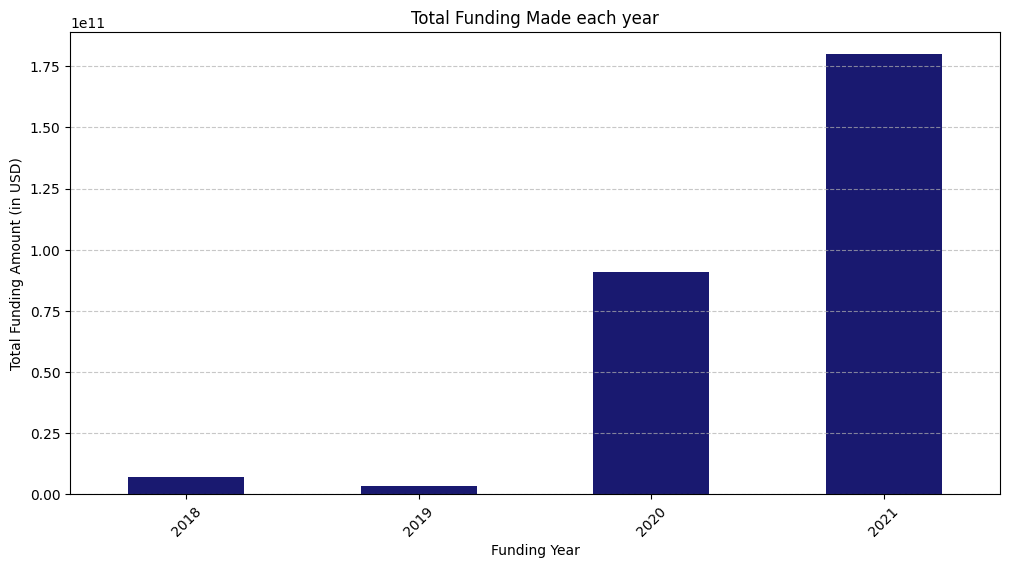

In [220]:
funding_by_year = data.groupby(by='Funding Year') ['Amount'].sum()

# Creating a bar plot to visualize the distribution of funding amounts by year
plt.figure(figsize=(12, 6))
funding_by_year.plot(kind='bar', color='midnightblue')
plt.xlabel('Funding Year')
plt.ylabel('Total Funding Amount (in USD)')
plt.title('Total Funding Made each year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Based on the observations:

- 2018: $6,833,923,177.00
- 2019: $3,408,433,200.00
- 2020: $90,805,818,604.00
- 2021: $180,102,026,000.00

Comparing the funding amounts for the years 2019 and 2020, we can see a significant increase in funding in 2020, almost 26 times higher than the funding in 2019. This substantial surge in funding during 2020 indicates that the COVID-19 pandemic may have had a notable impact on startup funding. The large increase in funding during the pandemic suggests that investors and venture capitalists continued to invest in startups, possibly due to the rise of new opportunities and innovative solutions in response to the challenges posed by the pandemic.

2.  What is the range of funds generally received by startups in India (Descriptive Statistics of Funding Amounts)?

In [221]:
# Getting the statistical analysis of the amount column
data['Amount'].describe()

count             2,856.00
mean         98,441,947.12
std       3,097,962,801.35
min                 876.00
25%           1,000,000.00
50%           3,000,000.00
75%           8,000,000.00
max     150,000,000,000.00
Name: Amount, dtype: float64

In [222]:
fig = px.box(data, x='Funding Year', y='Amount')
fig.update_traces(marker_color='midnightblue', marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Descriptive Statistics of Funding Amounts', yaxis_type='log')
fig.show()


3. Which cities have the highest number of startups?

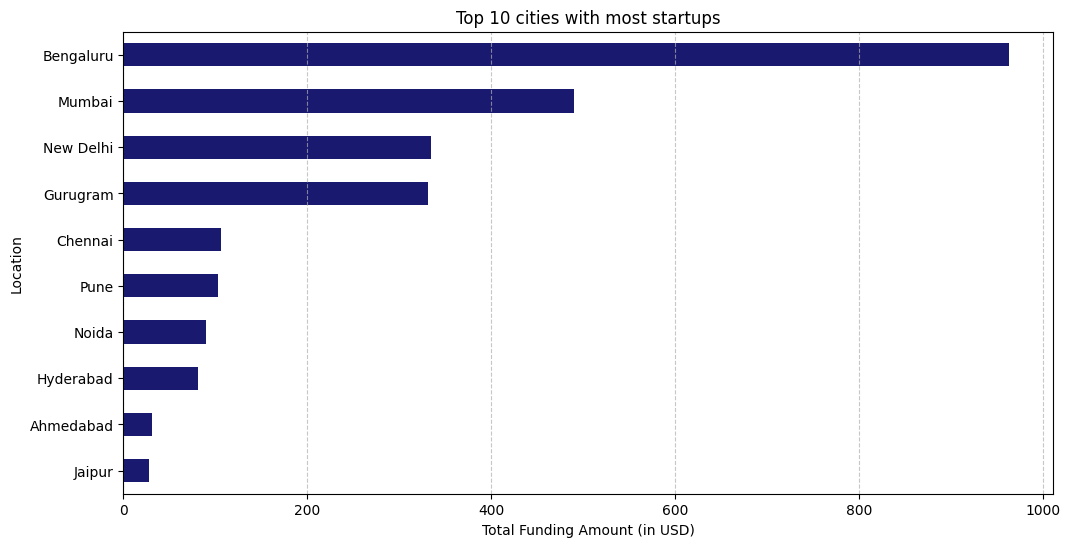

In [223]:
top_10 = data['Location'].value_counts().head(10)
# Sort the values
top_10_sorted = top_10.sort_values()
# Creating a bar plot to visualize the distribution of funding amounts by year
plt.figure(figsize=(12, 6))
top_10_sorted.plot(kind='barh', color='midnightblue')
plt.xlabel('Total Funding Amount (in USD)')
plt.ylabel('Location')
plt.title('Top 10 cities with most startups')
#plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

4. What are the top industries that received the highest funding amounts?

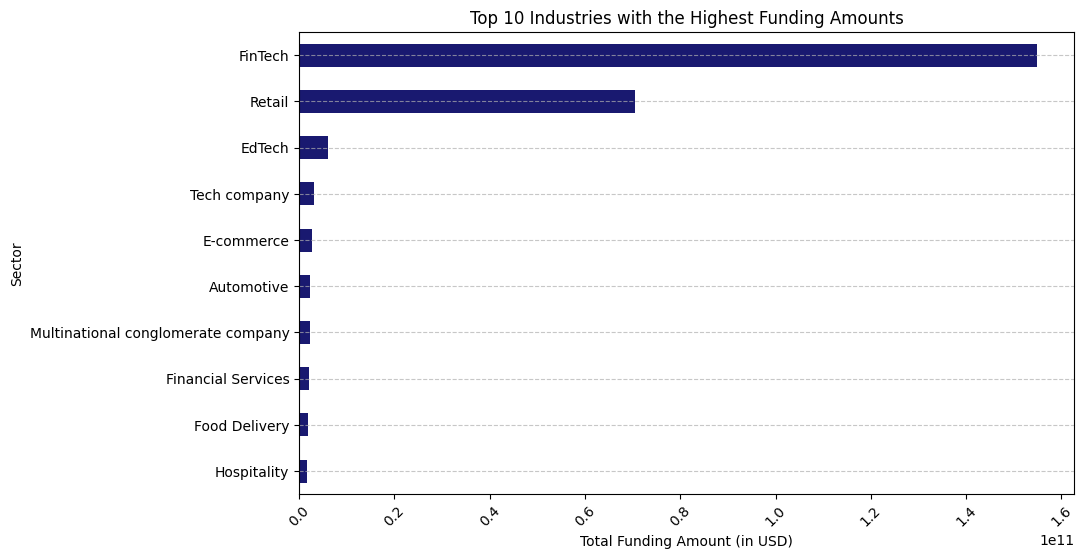

In [224]:
# Grouping the data by 'Sector' and calculating the total funding amounts for each industry
top_industries = data.groupby('Sector')['Amount'].sum().nlargest(10)
# Sort the values
top_industries_sorted = top_industries.sort_values()
# Creating a bar plot to visualize the top 10 industries with the highest funding amounts
plt.figure(figsize=(10, 6))
top_industries_sorted.plot(kind='barh', color='midnightblue')
plt.xlabel('Total Funding Amount (in USD)')
plt.ylabel('Sector')
plt.title('Top 10 Industries with the Highest Funding Amounts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

5. Which industries are favored by investors based on the number of funding rounds? 

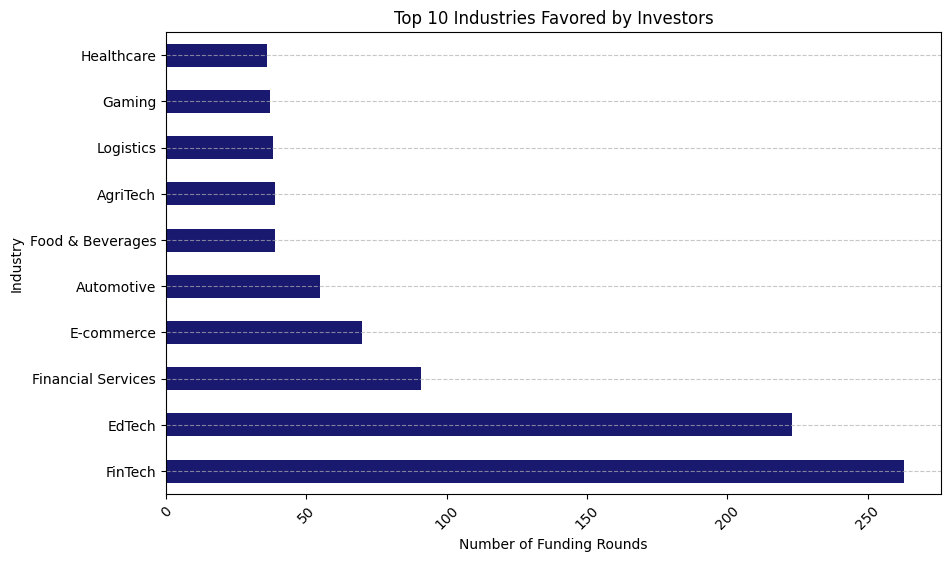

In [225]:
# Group the data by 'Sector' and count the number of funding rounds in each sector
industry_funding_counts = data.groupby('Sector')['Stage'].count()

# Sort the industries in descending order of funding rounds
top_10_industries = industry_funding_counts.sort_values(ascending=False).head(10)

# Create a bar plot to visualize the top 10 industries favored by investors
plt.figure(figsize=(10, 6))
top_10_industries.plot(kind='barh', color='midnightblue')
plt.ylabel('Industry')
plt.xlabel('Number of Funding Rounds')
plt.title('Top 10 Industries Favored by Investors')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

6. How many startups were funded each year?

In [226]:
startup_per_year = data.groupby(['Funding Year'])['Company'].agg(['count'])
startup_per_year

,count
Funding Year,
2018,525
2019,89
2020,1052
2021,1190


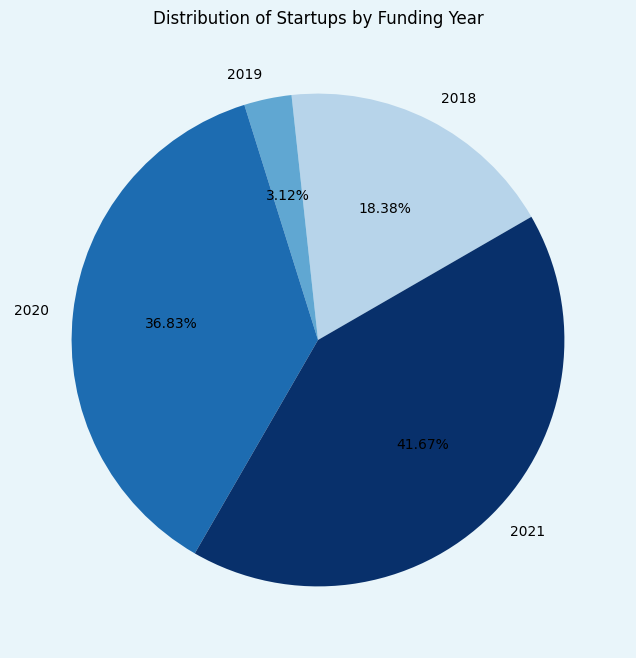

In [227]:
startup_per_year = data.groupby(['Funding Year'])['Company'].agg(['count'])
year = data['Funding Year'].unique()

# Define colormap with shades of midnightblue
cmap = plt.get_cmap('Blues')

# Create an array of colors based on the number of unique years
colors = [cmap(i) for i in np.linspace(0.3, 1, len(year))]

fig, ax = plt.subplots(figsize=(8, 8))
fig.set_facecolor('#E9F5FA')

ax.pie(startup_per_year['count'], labels=year.tolist(), autopct='%1.2f%%', startangle=30, colors=colors)
plt.title('Distribution of Startups by Funding Year')
plt.show()


7. What are the temporal patterns of funding amounts for startups over the years?

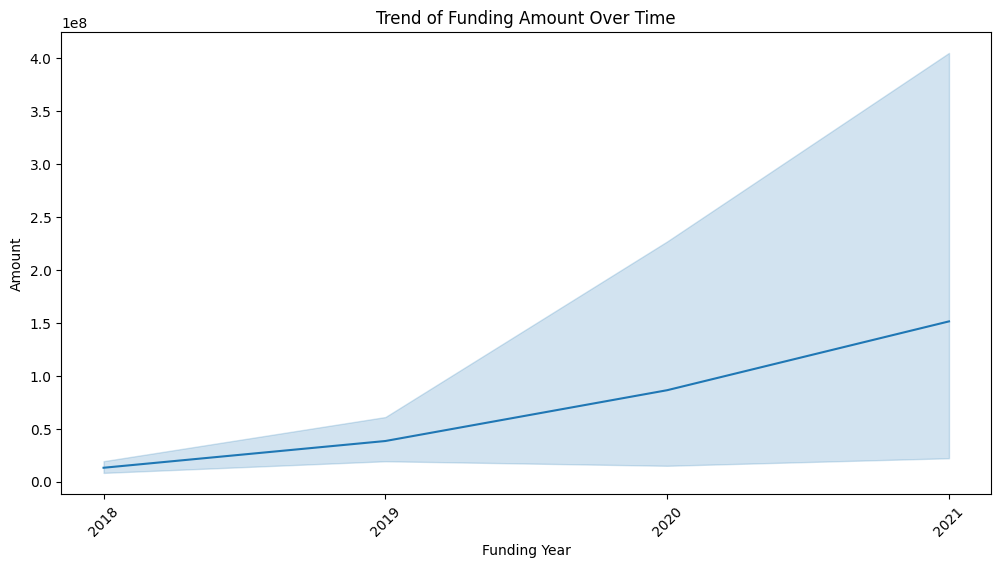

In [228]:
# Temporal patterns of funding

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Funding Year', y='Amount')
plt.title('Trend of Funding Amount Over Time')
plt.xlabel('Funding Year')
plt.ylabel('Amount')

# Customize x-axis ticks
plt.xticks(data['Funding Year'].unique(), rotation=45)

plt.show()

The line plot visualizes the trend of funding amounts over time, with the x-axis representing the Funding Year and the y-axis representing the funding Amount. By observing the line plot, the pattern is linear as the funding amount gradually increases from 2018 to 2021

8. Are there any correlations between the funding amount and the company's sector or location?

In [229]:
# Convert categorical variables into numerical representations using label encoding.
le = LabelEncoder()
data['SectorEncoded'] = le.fit_transform(data['Sector'])
data['LocationEncoded'] = le.fit_transform(data['Location'])

In [230]:
#Calculate the Pearson correlation coefficient between the funding amount and the numerical representation of the sector.
correlation_sector = data['Amount'].corr(data['SectorEncoded'], method='pearson')
print("Correlation between funding amount and sector:", correlation_sector)


Correlation between funding amount and sector: 0.011726590396950858


In [231]:
#Calculate the Pearson correlation coefficient between the funding amount and the numerical representation of the location
correlation_location = data['Amount'].corr(data['LocationEncoded'], method='pearson')
print("Correlation between funding amount and location:", correlation_location)


Correlation between funding amount and location: 0.02207348123575696


Pearson Correlation between funding amount and sector: 0.011726590396950858
This value is close to 0, which suggests that there is little to no linear relationship between the funding amount and the sector.

Pearson Correlation between funding amount and location: 0.02207348123575696
This value is also close to 0,  which suggests that there is little to no linear relationship between the funding amount and the location.

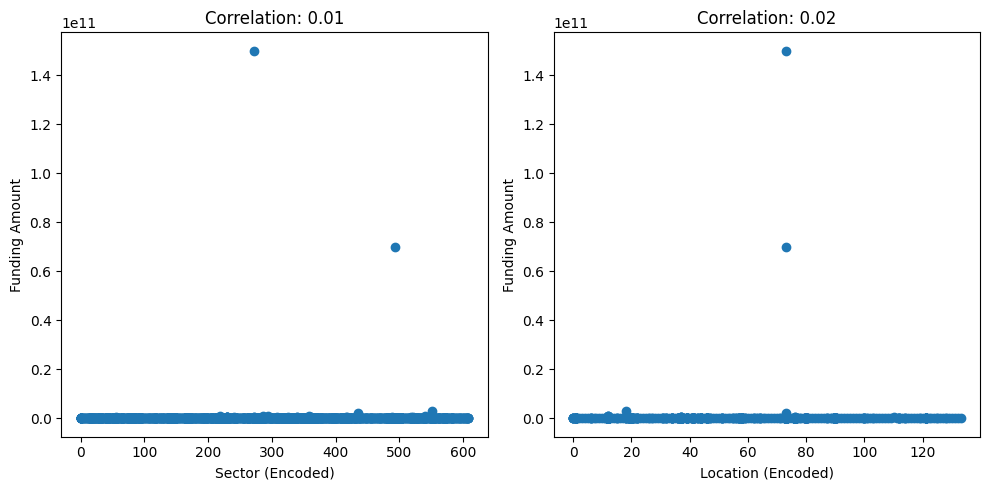

In [232]:
# Create scatter plots to visualize the correlation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['SectorEncoded'], data['Amount'])
plt.xlabel('Sector (Encoded)')
plt.ylabel('Funding Amount')
plt.title(f'Correlation: {correlation_sector:.2f}')

plt.subplot(1, 2, 2)
plt.scatter(data['LocationEncoded'], data['Amount'])
plt.xlabel('Location (Encoded)')
plt.ylabel('Funding Amount')
plt.title(f'Correlation: {correlation_location:.2f}')

plt.tight_layout()
plt.show()

9. What are the different types of funding received by startups?

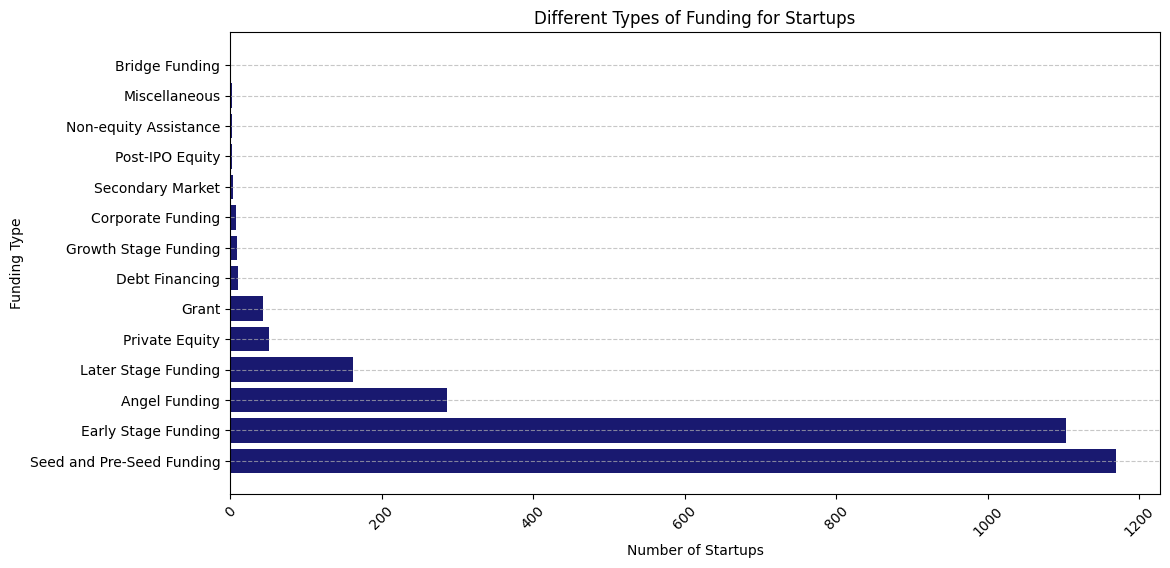

In [233]:
# Get the unique values in the 'Stage' column
funding_types = data['Stage'].unique()

# Count the number of startups for each funding type
count_by_funding_type = data['Stage'].value_counts()

# Creating a bar plot to visualize the different types of funding for startups
plt.figure(figsize=(12, 6))
plt.barh(funding_types, count_by_funding_type, color='midnightblue')
plt.ylabel('Funding Type')
plt.xlabel('Number of Startups')
plt.title('Different Types of Funding for Startups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


10. What is the percentage distribution of startups based on their location?

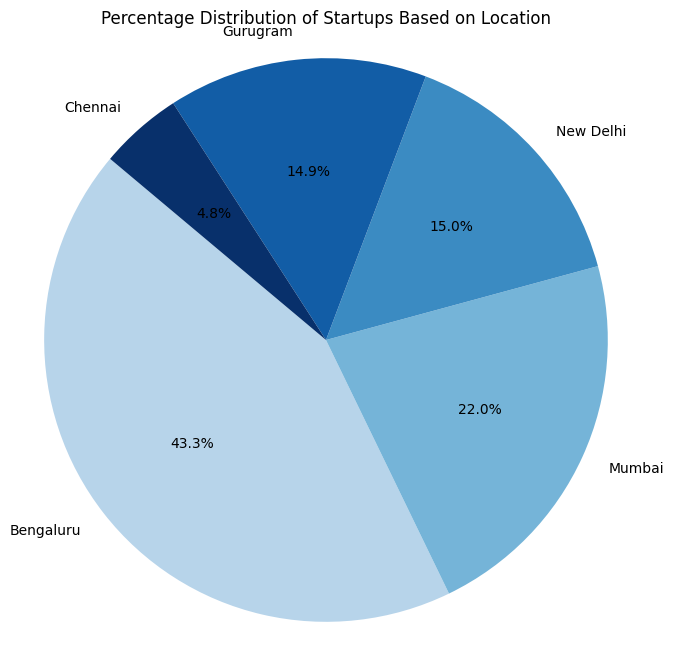

In [234]:
startup_counts_by_location = data['Location'].value_counts().head()

# Calculating the total number of startups
total_startups = len(data)

# Calculating the percentage share of startups in each location
percentage_share_by_location = (startup_counts_by_location / total_startups) * 100

# Define colormap with shades of midnightblue
cmap = plt.get_cmap('Blues')

# Create an array of colors based on the number of unique locations
colors = [cmap(i) for i in np.linspace(0.3, 1, len(startup_counts_by_location))]

# Creating a pie chart to visualize the percentage distribution of startups based on location
plt.figure(figsize=(8, 8))
plt.pie(percentage_share_by_location, labels=percentage_share_by_location.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Percentage Distribution of Startups Based on Location')
plt.show()


11. How has the number of startups funded each year changed over time?

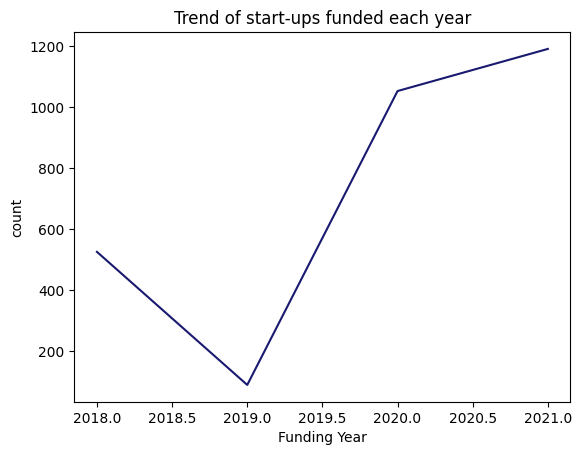

In [235]:
startup_per_year = data.groupby(['Funding Year'])['Company'].agg(['count'])
sns.lineplot(data=startup_per_year, y="count", x=startup_per_year.index, color="midnightblue")
plt.title('Trend of start-ups funded each year')
plt.show()


### Hypothesis:

#### NULL Hypothesis (HO) :

#### **The sector of a company does not have an impact on the amount of funding it receives.**


#### ALTERNATE Hypothesis (HA):

#### **The sector of a company does have an impact on the amount of funding it receives.**





In [236]:
# Filter out sectors with less than two data points
sectors = data['Sector'].unique()
valid_sectors = [sector for sector in sectors if pd.notna(sector) and data['Sector'].value_counts().get(sector, 0) >= 2]

# Create lists of 'Amount' for each valid sector
amounts_by_sector = [data[data['Sector'] == sector]['Amount'] for sector in valid_sectors]

# Check if there are at least two valid sectors with sufficient data
if len(amounts_by_sector) < 2:
    print("Error: Insufficient data with more than one variability to perform the Kruskal-Wallis test.")
else:
    # Kruskal-Wallis Test
    result_kruskal = kruskal(*amounts_by_sector)

    # Set the significance level (alpha)
    alpha = 0.05

    print("Kruskal-Wallis Test:")
    print("H-statistic:", result_kruskal.statistic)
    print("P-value:", result_kruskal.pvalue)

    # Compare the p-value with the significance level to make a decision
    if result_kruskal.pvalue < alpha:
        print("Reject the null hypothesis: The sector of a company does have an impact on the amount of funding it receives.")
    else:
        print("Fail to reject the null hypothesis: The sector of a company does not have an impact on the amount of funding it receives.")


Kruskal-Wallis Test:
H-statistic: 447.5778180047062
P-value: 9.861107779831321e-13
Reject the null hypothesis: The sector of a company does have an impact on the amount of funding it receives.
